# MD004 ENTREGAS ANOVA

### <font color='#3d59c6'> PARTE I </font>

Contexto: Imagina que te llega un conjunto de datos que contiene tres variables categóricas>> A,B y C (con 2 categorías cada una).  

#### <font color='#3d59c6'> ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? </font>

#### 1. Estrategia con Two-Way ANOVA

Un Two-Way ANOVA, solo puede procesar dos factores independientes a la vez. Como en este caso tenemos tres variables (`A`, `B`, `C`), no podemos meterlas todas en un solo modelo de Dos Vías a la vez.

Para hacerlo lo mejor seria plantear tres modelos separados, así analizamos las interacciones por parejas (que se harían con el Two-Way ANOVA).

* Modelo 1: Analizar $Y \sim A * B$ (Ignorando $C$ o manteniendo $C$ constante).
* Modelo 2: Analizar $Y \sim A * C$ (Ignorando $B$).
* Modelo 3: Analizar $Y \sim B * C$ (Ignorando $A$).


* Haciendo esto podemos ver si el efecto de $A$ depende de $B$ (interacción de primer orden).
* Lo malo de hacerlo así es que perdemos la "Visión Global". No podemos ver la interacción triple ($A:B:C$). Por ejemplo, podría ocurrir que el tratamiento $A$ solo funcione cuando $B$ es positivo y $C$ es negativo. Un conjunto de Two-Way ANOVAs no detectará esto. Además, aumentamos el error de Tipo I al hacer múltiples tests.

---

#### 2. Estrategia con One-Way ANOVA

Otra opción seria hacer un One-Way ANOVA, que este solo acepta un único factor (variable de agrupación) para comparar medias. 

En este caso tendríamos dos formas de abordarlo:

##### Estrategia A: Enfoque Simplista:
Hacer tres ANOVAs independientes:
1.  $Y \sim A$
2.  $Y \sim B$
3.  $Y \sim C$
* Esto es muy pobre. Solo vemos los "Efectos Principales". Asumimos que los factores no interactúan entre sí, lo cual en biología o ciencia de datos casi nunca es cierto.

##### Estrategia B: Enfoque Combinado:
Para recoger toda la información de $A, B$ y $C$ en un solo One-Way ANOVA, debemos crear una nueva variable sintética que represente todas las combinaciones posibles.

* Como cada variable tiene 2 niveles (digamos 0 y 1), tenemos $2 \times 2 \times 2 = 8$ combinaciones únicas.
* Creamos la variable `Grupo` con niveles: $A0B0C0$, $A1B0C0$, $A0B1C0$... hasta 8 grupos.
* Modelo: $Y \sim Grupo$ (Variable con 8 niveles).

El One-Way ANOVA nos dirá si hay diferencia entre alguno de esos 8 grupos. Si sale significativo, tendríamos que hacer pruebas *post-hoc* para entender qué combinación específica es la diferente.

#### <font color='#3d59c6'> ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? </font>

#### 3. Consideraciones Cruciales de Diseño 

Si tuviéramos que diseñar este análisis en la vida real, tendría en cuenta estos 4 puntos críticos:

1. Interacción Oculta:
* Al usar *One-Way* o múltiples *Two-Way*, estamos "rompiendo" la estructura factorial.
* La forma estadísticamente correcta de analizar esto seria un Three-Way ANOVA ($Y \sim A * B * C$). Si nos fuerzan a usar estrategias inferiores (como nos pide el enunciado), deberíamos advertir que se está perdiendo la interacción de segundo orden ($A:B:C$).

2. Inflación del Error Tipo I (Falsos Positivos):
* Al realizar múltiples tests (ej. tres modelos Two-Way separados o tres One-Way simples), aumentamos la probabilidad de encontrar una diferencia significativa por puro azar.
* Deberíamos aplicar una corrección de p-valor para ajustar el nivel de significancia.

3. Tamaño Muestral y Celdas Vacías:
* Al combinar variables (Estrategia One-Way combinada), pasamos de tener 2 grupos a tener 8 subgrupos.
* Necesitamos asegurarnos de tener suficientes datos en cada una de las 8 combinaciones. Si una combinación (ej. $A1-B1-C1$) tiene solo 1 o 2 sujetos, el análisis carecerá de potencia estadística y no podremos verificar la normalidad.

4. Interpretación Compleja:
* En la estrategia del One-Way con variable combinada, la interpretación se vuelve difícil. El ANOVA nos dirá "hay diferencias", pero no nos dirá si es culpa de A, de B o de C. Perderemos la capacidad de decir "El factor A aumenta la variable Y en 5 puntos", porque el efecto de A estará mezclado dentro de los grupos combinados.


> *"En resumen para realizar un Two-Way ANOVA, ejecutaría tres modelos independientes cruzando las variables por pares ($AxB, AxC, BxC$) para estudiar interacciones de primer orden, asumiendo el riesgo de perder la interacción triple. Para el One-Way ANOVA, crearía una única variable factor que concatene las combinaciones de A, B y C (generando 8 niveles) y compararía las medias de estos 8 grupos. Las consideraciones críticas serían: 1) La necesidad de corregir el error Tipo I por comparaciones múltiples, 2) La pérdida de información sobre la interacción triple ($A:B:C$) y 3) La necesidad de un tamaño muestral suficiente en los 8 subgrupos resultantes para cumplir los supuestos de normalidad y homocedasticidad."*

----

### <font color='#3d59c6'> PARTE II </font>

Se dispone del siguiente dataset que contiene en formato csv registros de diferentes deportistas y donde se recoge el valor de las siguientes variables teniendo como factores deporte y género:

- rcc: glóbulos rojos
- wcc: células blancas en la sangre
- hc: hematocritos(%)
- hg: concentración de hemoglobina, en gr por decalitro
- bmi: indice masa corporal
- sex: 2 categorías >> f m
- sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo


###### Data: 
202501_ais.csv

(selección de >> origen:https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

###### Se pide:

1. Visualización y comprensión del dataset (2p): Se pide visualizar y realizar estadísticos que ayuden a comprender mejor el dataset dentro del dominio de ANOVA: Análisis descriptivo de las variables continuas y de nuestros factores y análisis de correlaciones
2. Calcular la prueba ANOVA One-Way para la variable sport respecto 2 variables continuas (escoged). Interpretar resultados y acompañar con los gráficos vistos en clase (3p)
3. Calcular la prueba ANOVA Two-Way con ambos factores respecto 2 variables continuas (diferentes a las anteriores): comentad todo lo que observeis, ¿es sport significativa?¿y sex? ¿y conjuntamente? (3p)

;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br> 

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área
- **ggplot2**: la usamos para crear gráficos más personalizables o dico de otra maenra, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables.

In [1]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
options(repr.plot.width = 16, repr.plot.height = 10)

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [3]:
data_ais <- read.csv(
  file = "202501_ais.csv", header = TRUE,
  sep = ";", dec = "."
)

In [4]:
head(data_ais)
tail(data_ais)

,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
119,173,5.49,5.9,47.7,15.9,22.28,m,T_400m
120,175,5.03,6.6,44.7,15.9,19.85,m,T_400m
121,199,5.66,8.3,50.2,17.7,23.76,m,Tennis
122,200,5.03,6.4,42.7,14.3,22.01,m,Tennis
123,201,4.97,8.8,43.0,14.9,22.34,m,Tennis
124,202,5.38,6.3,46.0,15.7,21.07,m,Tennis


## <font color='#3d59c6'>  1. Visualización y comprensión del dataset </font>

Primero de todo convertimos las variables categóricas a factor, para después analizar el dataset.

In [5]:
data_ais$sex <- as.factor(data_ais$sex)
data_ais$sport <- as.factor(data_ais$sport)

In [6]:
str(data_ais)
summary(data_ais)

'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport   : Factor w/ 5 levels "B_Ball","Row",..: 1 1 1 1 1 1 1 1 1 1 ...


    rownames           rcc             wcc               hc       
 Min.   :  1.00   Min.   :3.900   Min.   : 3.300   Min.   :36.40  
 1st Qu.: 31.75   1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98  
 Median : 98.50   Median :4.695   Median : 6.600   Median :43.15  
 Mean   : 89.99   Mean   :4.676   Mean   : 6.613   Mean   :43.00  
 3rd Qu.:131.25   3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23  
 Max.   :202.00   Max.   :5.660   Max.   :10.100   Max.   :50.20  
       hg             bmi        sex       sport   
 Min.   :11.60   Min.   :16.75   f:62   B_Ball:25  
 1st Qu.:13.78   1st Qu.:20.80   m:62   Row   :37  
 Median :14.60   Median :22.33          Swim  :22  
 Mean   :14.52   Mean   :22.29          T_400m:29  
 3rd Qu.:15.40   3rd Qu.:23.73          Tennis:11  
 Max.   :17.70   Max.   :26.79                     

Con esta primera muestra de los datos podemos ver 3 cosas importantes:

1. Tenemos un dataset de 124 observaciones con 8 variables cada una.
    * Con un balance en la variable `sex` perfecta.
2. La estructura es correcta (tenemos números y factores).
    * No hay NAs.
3. Lo que si que hay es un desbalance en el factor `sport`:
    * Primero de todo en el enunciado nos dicen que hay 9 variables y realmente solo hay 5.
    * Row tiene 37 atletas y Tennis solo 11.
    * Los grupos no son del todo balanceados, se tendrá en cuenta pero no impide el análisis.

Vamos a analizar a fondo la variable `sport` para ver realmente que pasa. 

Niveles detectados en la variable 'sport'
[1] "B_Ball" "Row"    "Swim"   "T_400m" "Tennis"

Tabla de Frecuencias y Desbalance
   sport  n porcentaje   etiqueta
1    Row 37  29.838710 37 (29.8%)
2 T_400m 29  23.387097 29 (23.4%)
3 B_Ball 25  20.161290 25 (20.2%)
4   Swim 22  17.741935 22 (17.7%)
5 Tennis 11   8.870968  11 (8.9%)

Deportes faltantes
El dataset NO contiene:
[1] "Netball" "T_Sprnt" "W_Polo" 


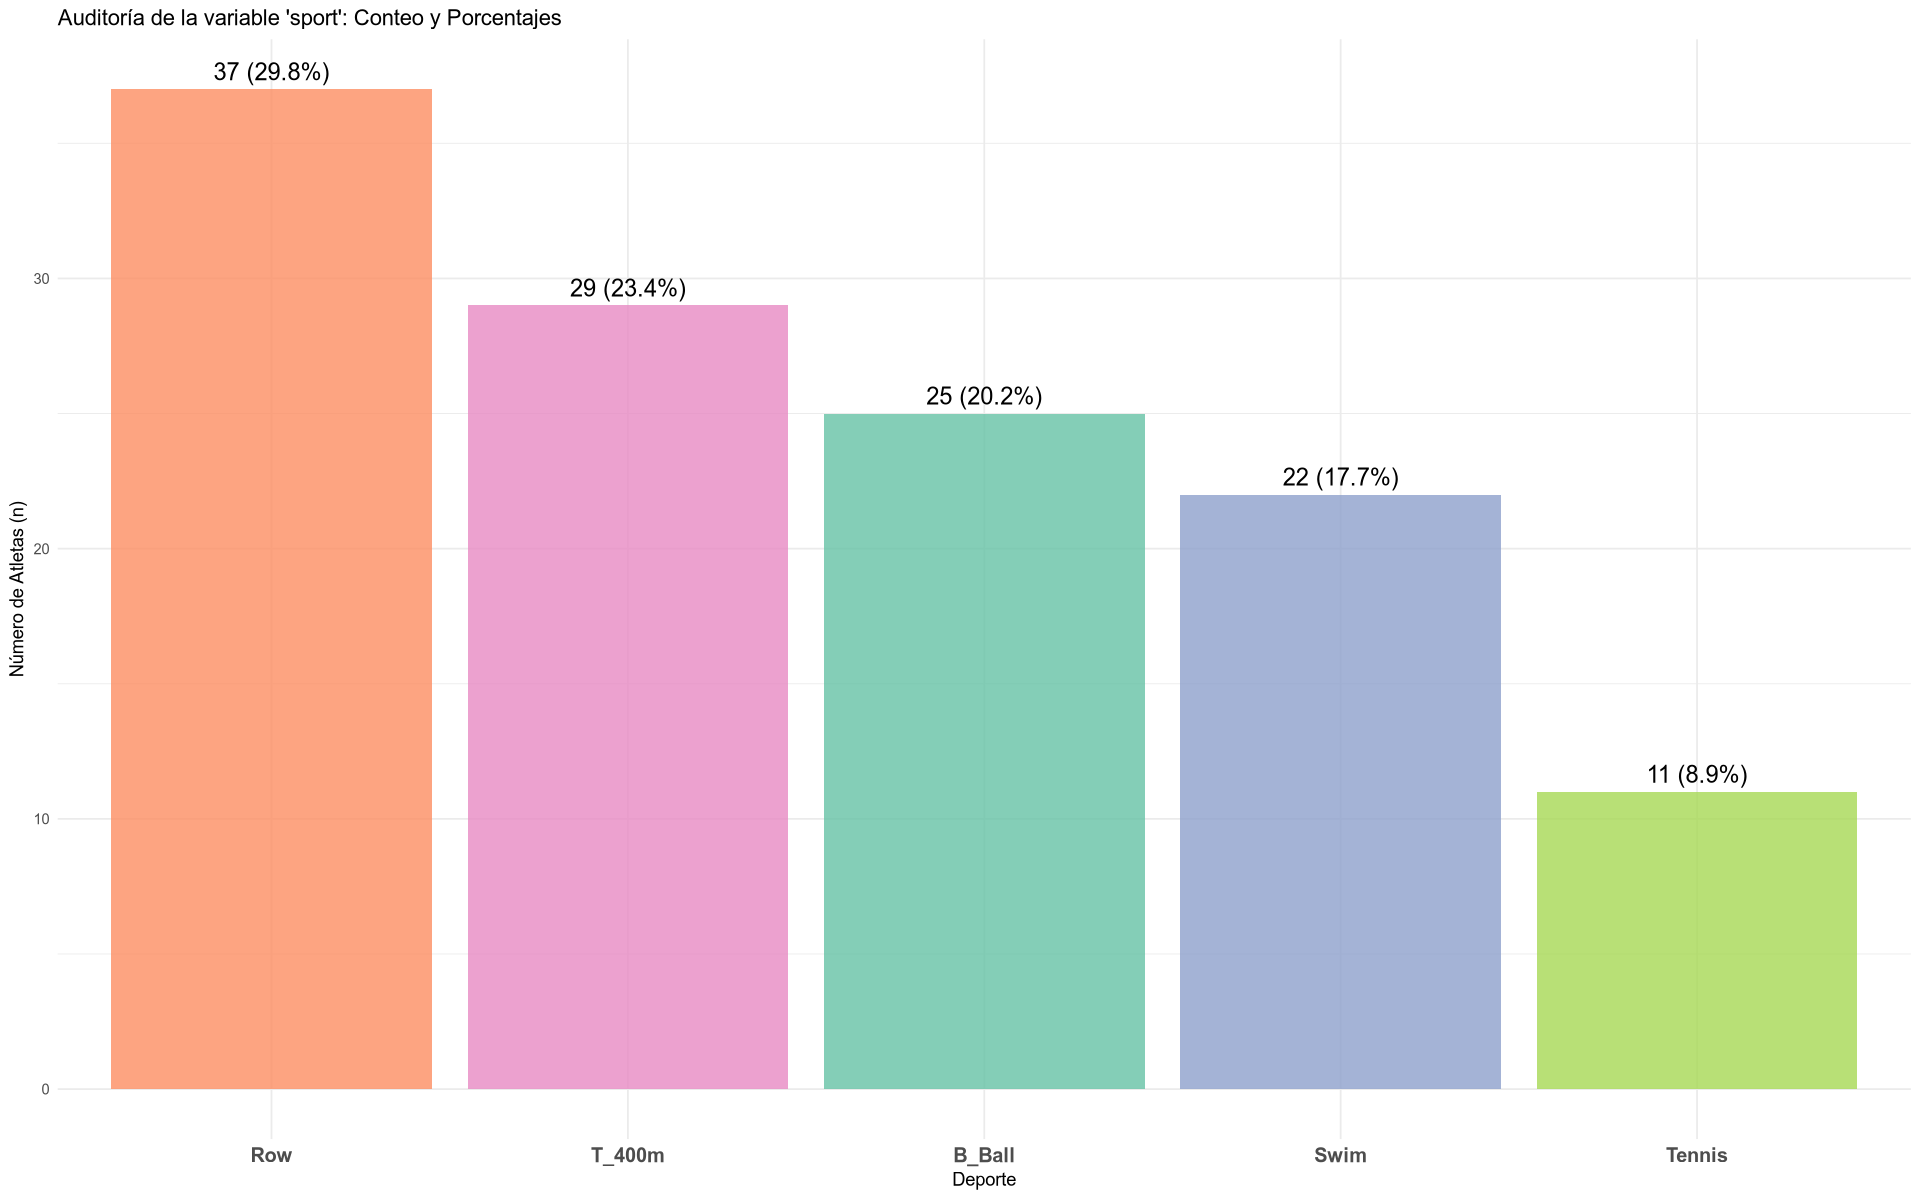

In [7]:
cat("Niveles detectados en la variable 'sport'\n")
print(levels(data_ais$sport))

sport_analysis <- data_ais |>
  count(sport) |>
  mutate(
    porcentaje = n / sum(n) * 100,
    etiqueta = paste0(n, " (", round(porcentaje, 1), "%)")
  ) |>
  arrange(desc(n))

cat("\nTabla de Frecuencias y Desbalance\n")
print(sport_analysis)

deportes_esperados <- c(
  "B_Ball", "Netball", "Row", "Swim",
  "T_400m", "T_Sprnt", "Tennis", "W_Polo"
)
deportes_presentes <- levels(data_ais$sport)
deportes_ausentes <- setdiff(deportes_esperados, deportes_presentes)

cat("\nDeportes faltantes\n")
if (length(deportes_ausentes) > 0) {
  cat("El dataset NO contiene:\n")
  print(deportes_ausentes)
} else {
  cat("Están todos los deportes esperados.")
}

ggplot(sport_analysis, aes(x = reorder(sport, -n), y = n, fill = sport)) +
  geom_bar(stat = "identity", alpha = 0.8) +
  geom_text(aes(label = etiqueta), vjust = -0.5, size = 5) +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Auditoría de la variable 'sport': Conteo y Porcentajes",
    x = "Deporte",
    y = "Número de Atletas (n)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 12, face = "bold"),
    legend.position = "none"
  )

Hemos confirmado que faltan 3 deportes: Netball, T_Sprnt, W_Polo.

Al tener este desbalanceo volvemos a decir que reduce la potencia estadística para los grupos pequeños.

Ahora procedemos a crear histogramas y boxplots para todas las variables numéricas:

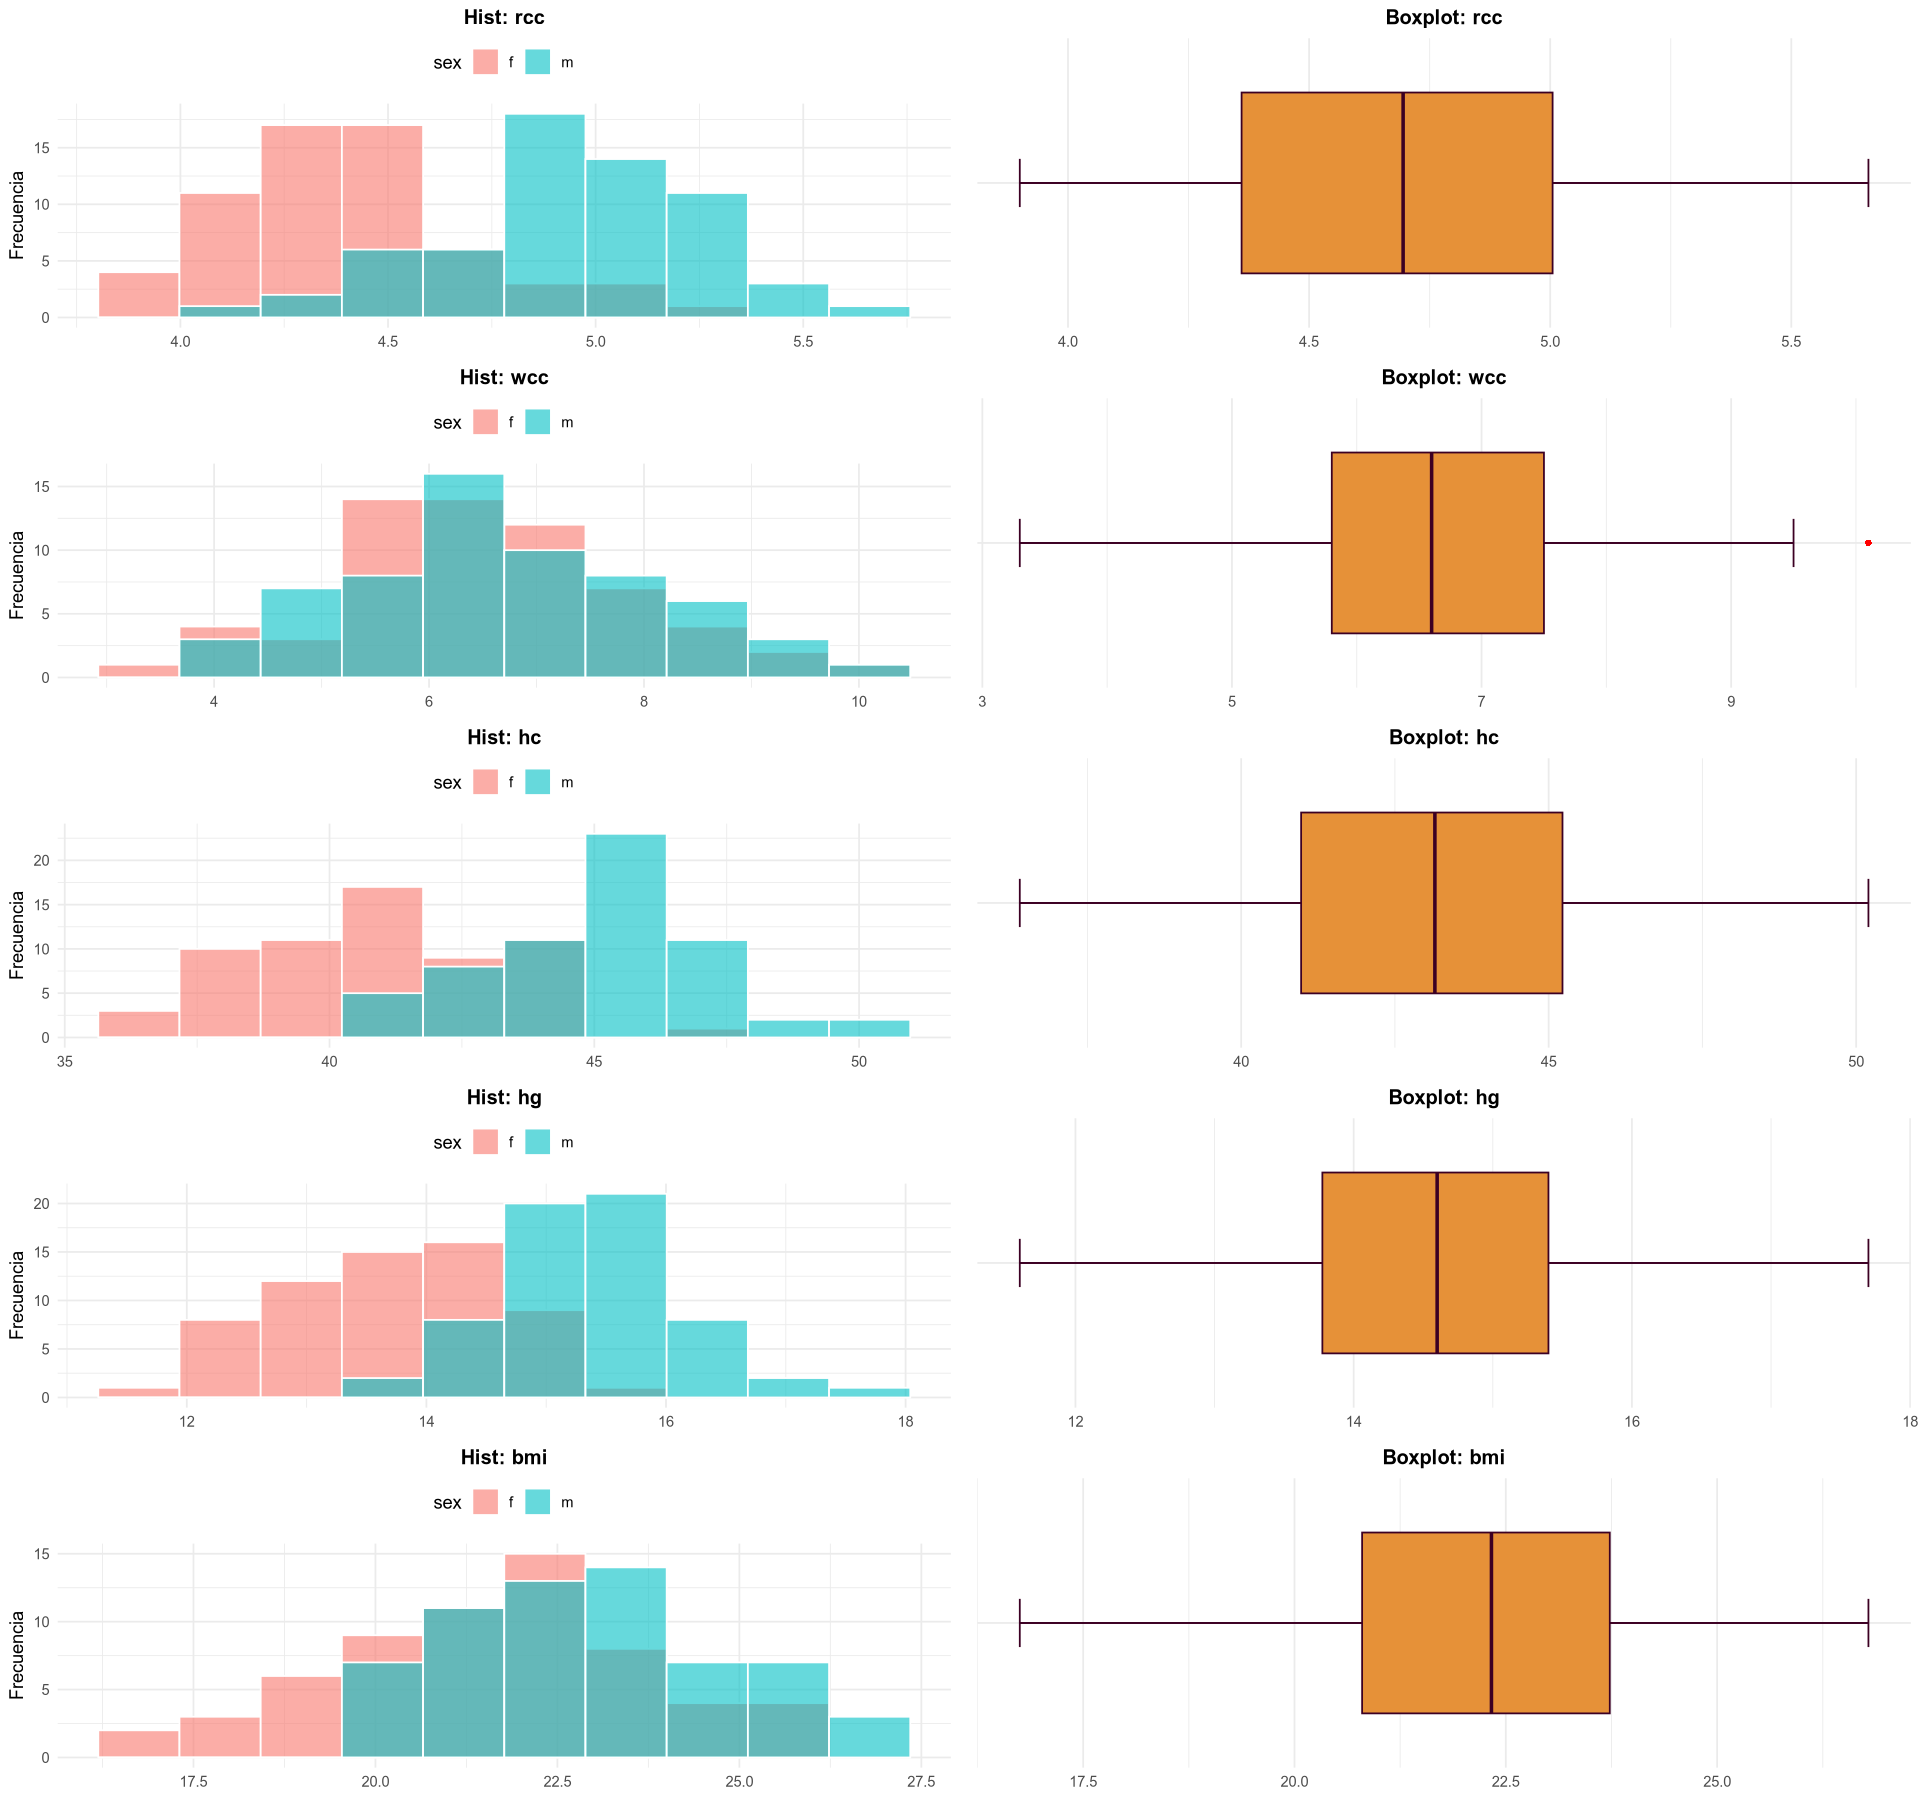

In [8]:
vars_to_plot <- c("rcc", "wcc", "hc", "hg", "bmi")

todos_los_graficos <- list()

for (variable in vars_to_plot) {
  p_hist <- ggplot(data_ais, aes(x = .data[[variable]], fill = sex)) +
    geom_histogram(
      bins = 10,
      color = "white",
      alpha = 0.6,
      position = "identity",
      na.rm = TRUE
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
      axis.title.x = element_blank(),
      legend.position = "top"
    ) +
    labs(title = paste("Hist:", variable), y = "Frecuencia")

  p_box <- ggplot(data_ais, aes(x = "", y = .data[[variable]])) +
    stat_boxplot(geom = "errorbar", width = 0.2, color = "#3c0023") +
    geom_boxplot(
      fill = "#e69138",
      color = "#3c0023",
      outlier.colour = "red",
      outlier.shape = 16
    ) +
    coord_flip() +
    theme_minimal() +
    theme(
      plot.title = element_text(size = 12, face = "bold", hjust = 0.5),
      axis.title.x = element_blank(),
      axis.title.y = element_blank()
    ) +
    labs(title = paste("Boxplot:", variable))

  todos_los_graficos[[length(todos_los_graficos) + 1]] <- p_hist
  todos_los_graficos[[length(todos_los_graficos) + 1]] <- p_box
}

options(
  repr.plot.width = 16,
  repr.plot.height = 15
)

grid.arrange(grobs = todos_los_graficos, ncol = 2)

Al separar en los histogramas los datos por sexo (f: rosa, m:azul), podemos analizarlos mejor. Anteriormente lo había hecho todo junto pero cambia radicalmente. 

#### 1. Bimodalidad (Variables Sanguíneas)
Antes con los histogramas con los sexos juntos veíamos un doble pico en rcc, hc y hg, ahora vemos claro que es fruto de un dimorfismo sexual.
* Existe una separación casi perfecta entre hombres y mujeres en estas tres variables.
    * Mujeres: Se agrupan a la izquierda (valores más bajos).
    * Hombres: Se agrupan a la derecha (valores más altos).
* Esto confirma que, en este grupo de deportistas, los hombres tienen sistemáticamente mayor concentración de glóbulos rojos, hematocritos y hemoglobina que las mujeres. Analizar estas variables en conjunto (como en el boxplot naranja de la derecha) es un error estadístico, porque se están mezclando dos poblaciones distintas con medias diferentes.

#### 2. Comportamiento del `wcc` (Glóbulos Blancos)
A diferencia de las variables anteriores, el conteo de glóbulos blancos (`wcc`) muestra un comportamiento muy diferente:
* Las barras rosas y azules están mezcladas. No hay una separación clara de grupos, hay un gran solapamiento.
* El sexo no parece ser un factor determinante en la cantidad de glóbulos blancos. Tanto hombres como mujeres siguen esa distribución asimétrica positiva (la mayoría tiene valores bajos, con algunos casos altos).
* El valor atípico destaca aún más ahora, ya que vemos que se aleja de la distribución normal de *ambos* sexos.

#### 3. Análisis del `bmi` (Índice de Masa Corporal)
* Aunque hay mezcla entre hombres y mujeres, se observa que la distribución azul (hombres) está ligeramente desplazada hacia la derecha respecto a la rosa.
* Los hombres en este dataset tienden a tener un IMC ligeramente superior, pero hay muchas mujeres con un IMC igual al de los hombres. A diferencia de la sangre, aquí no hay dos grupos aislados, sino un espectro continuo de cuerpos atléticos.

#### 4. Crítica a los Boxplots
Una observación clave para este análisis es notar la discrepancia entre los histogramas y los boxplots:
* Histogramas: Nos cuentan la historia completa (hay dos grupos diferenciados por sexo).
* Boxplots: Al estar unificados, están ocultando la información.
    * *Ejemplo en `rcc`:* El boxplot muestra una caja muy ancha ("dispersa"), pero ahora sabemos que esa dispersión no es real, sino que es la distancia entre el grupo de mujeres y el de hombres.

En conlusión:

> *"La estratificación por género revela que las variables hematológicas (`rcc`, `hc`, `hg`) presentan comportamientos fisiológicos distintos según el sexo, lo que explicaba la bimodalidad observada en el análisis global. Por el contrario, variables como `wcc` y `bmi` presentan un mayor grado de homogeneidad entre sexos. Esto sugiere que cualquier análisis estadístico posterior (como detección de outliers o predicciones) debe hacerse separando la muestra por género para las variables sanguíneas, mientras que para `wcc` podría tratarse como un grupo único."*

También tenemos en cuenta que el outlier que hemos comentado en `wcc`. Antes de todo queremos comprobar que entrada es para un mantener un analisis seguido.

In [9]:
valores_outlier <- boxplot.stats(data_ais$wcc)$out
filas_outliers <- data_ais[data_ais$wcc %in% valores_outlier, ]
print(filas_outliers)

   rownames  rcc  wcc   hc   hg   bmi sex sport
32       32 4.44 10.1 42.7 14.0 23.06   f   Row
87      125 5.09 10.1 44.9 14.8 26.79   m   Row


Realmente vemos que son dos outliers juntos. Al ser los dos de deporte `row` podría ser perfectamente real. Y al compararlos con la media y mediana vemos que tampoco están sesgando los datos.

Ahora seguimos con comprobar la distribución del Sexo y la relación entre Sexo y Deporte.

Distribución por Sexo

 f  m 
62 62 

Tabla de Contingencia (Sexo x Deporte)


,f,m,Sum
B_Ball,13,12,25
Row,22,15,37
Swim,9,13,22
T_400m,11,18,29
Tennis,7,4,11
Sum,62,62,124


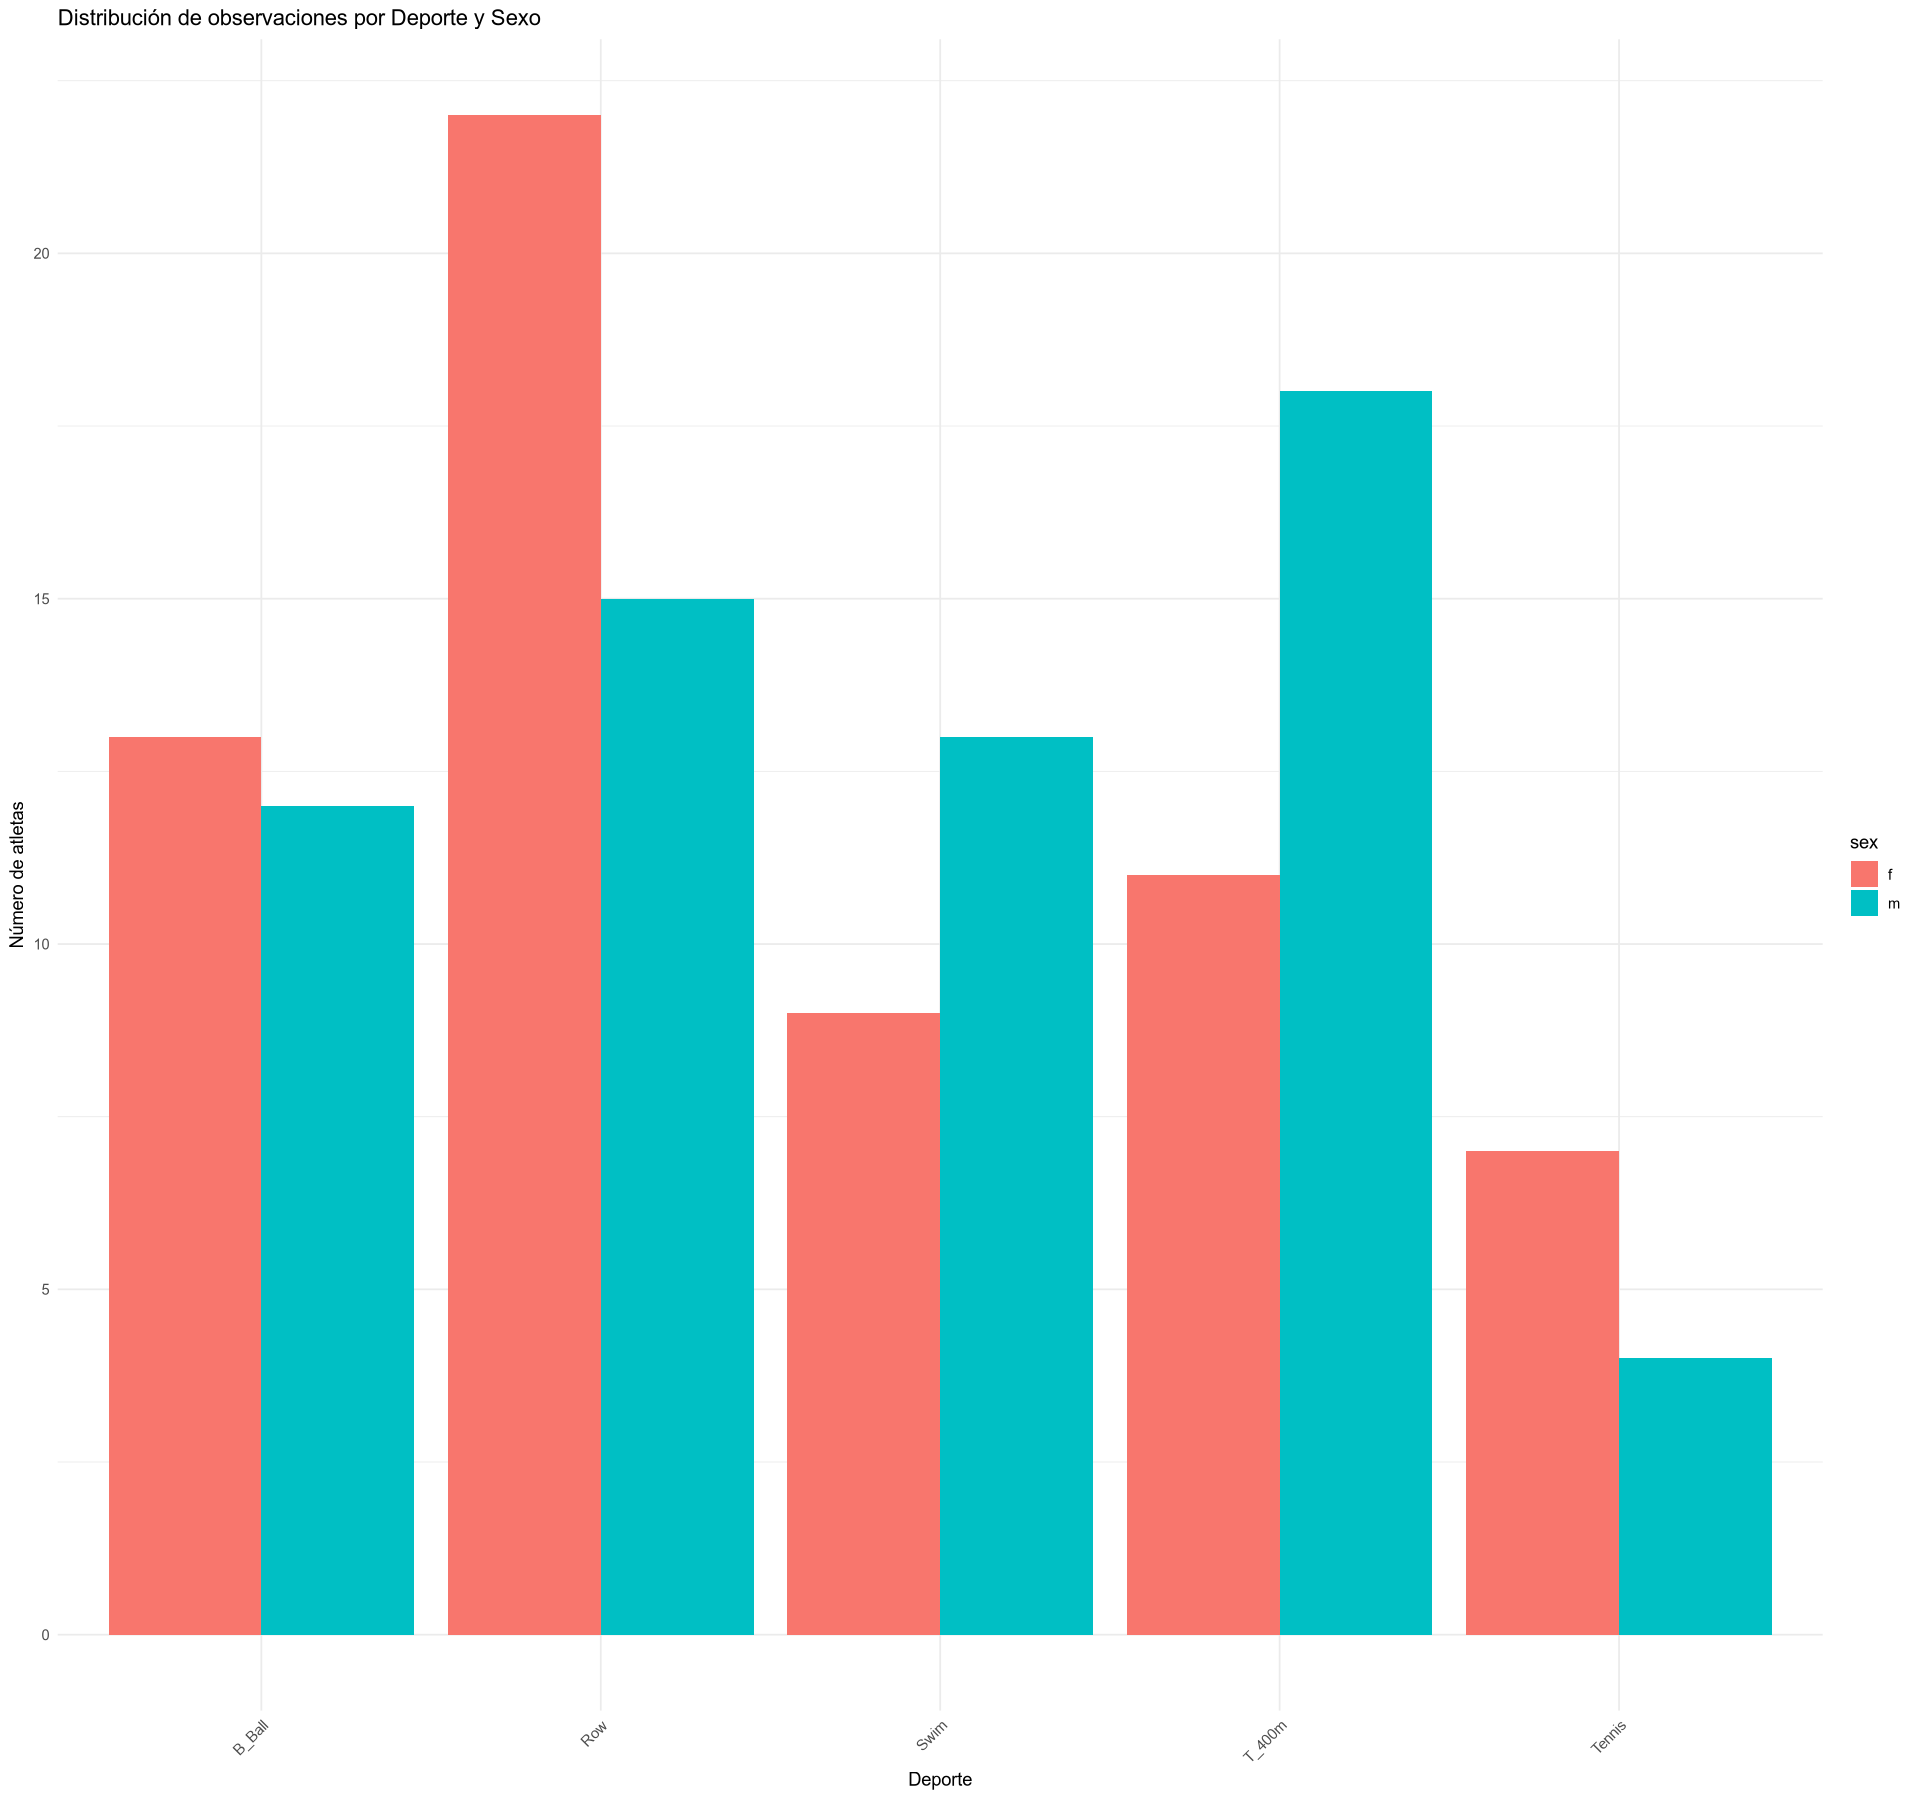

In [10]:
cat("Distribución por Sexo\n")
print(table(data_ais$sex))

cat("\nTabla de Contingencia (Sexo x Deporte)\n")
addmargins(table(data_ais$sport, data_ais$sex))

ggplot(data_ais, aes(x = sport, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Distribución de observaciones por Deporte y Sexo",
    y = "Número de atletas", x = "Deporte"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El análisis de la estructura del dataset revela un escenario mixto:

1. El factor Género presenta un balanceo perfecto (50% Hombres, 50% Mujeres), lo que garantiza robustez en los análisis univariantes de sexo.
2. Otra vez mencionamos que el factor Deporte es no balanceado, con una sobrerrepresentación de `Row` (n=37) frente a `Tennis` (n=11).
3. La tabla de contingencia muestra que todas las combinaciones Sexo-Deporte tienen datos, pero la intersección Tennis-Male cuenta con solo n=4 observaciones. Esto representa una limitación para el análisis de interacciones (Two-Way ANOVA), ya que la estimación de parámetros (media/varianza) para este subgrupo será poco robusta.

Ahora como antes hemos hecho los boxplots solo con un género y ya hemos analizado mejor la variable `sexo`. Procedemos a hacer otros boxplots relacionando las variables `sexo` y `deportes` para analizarlos mejor:

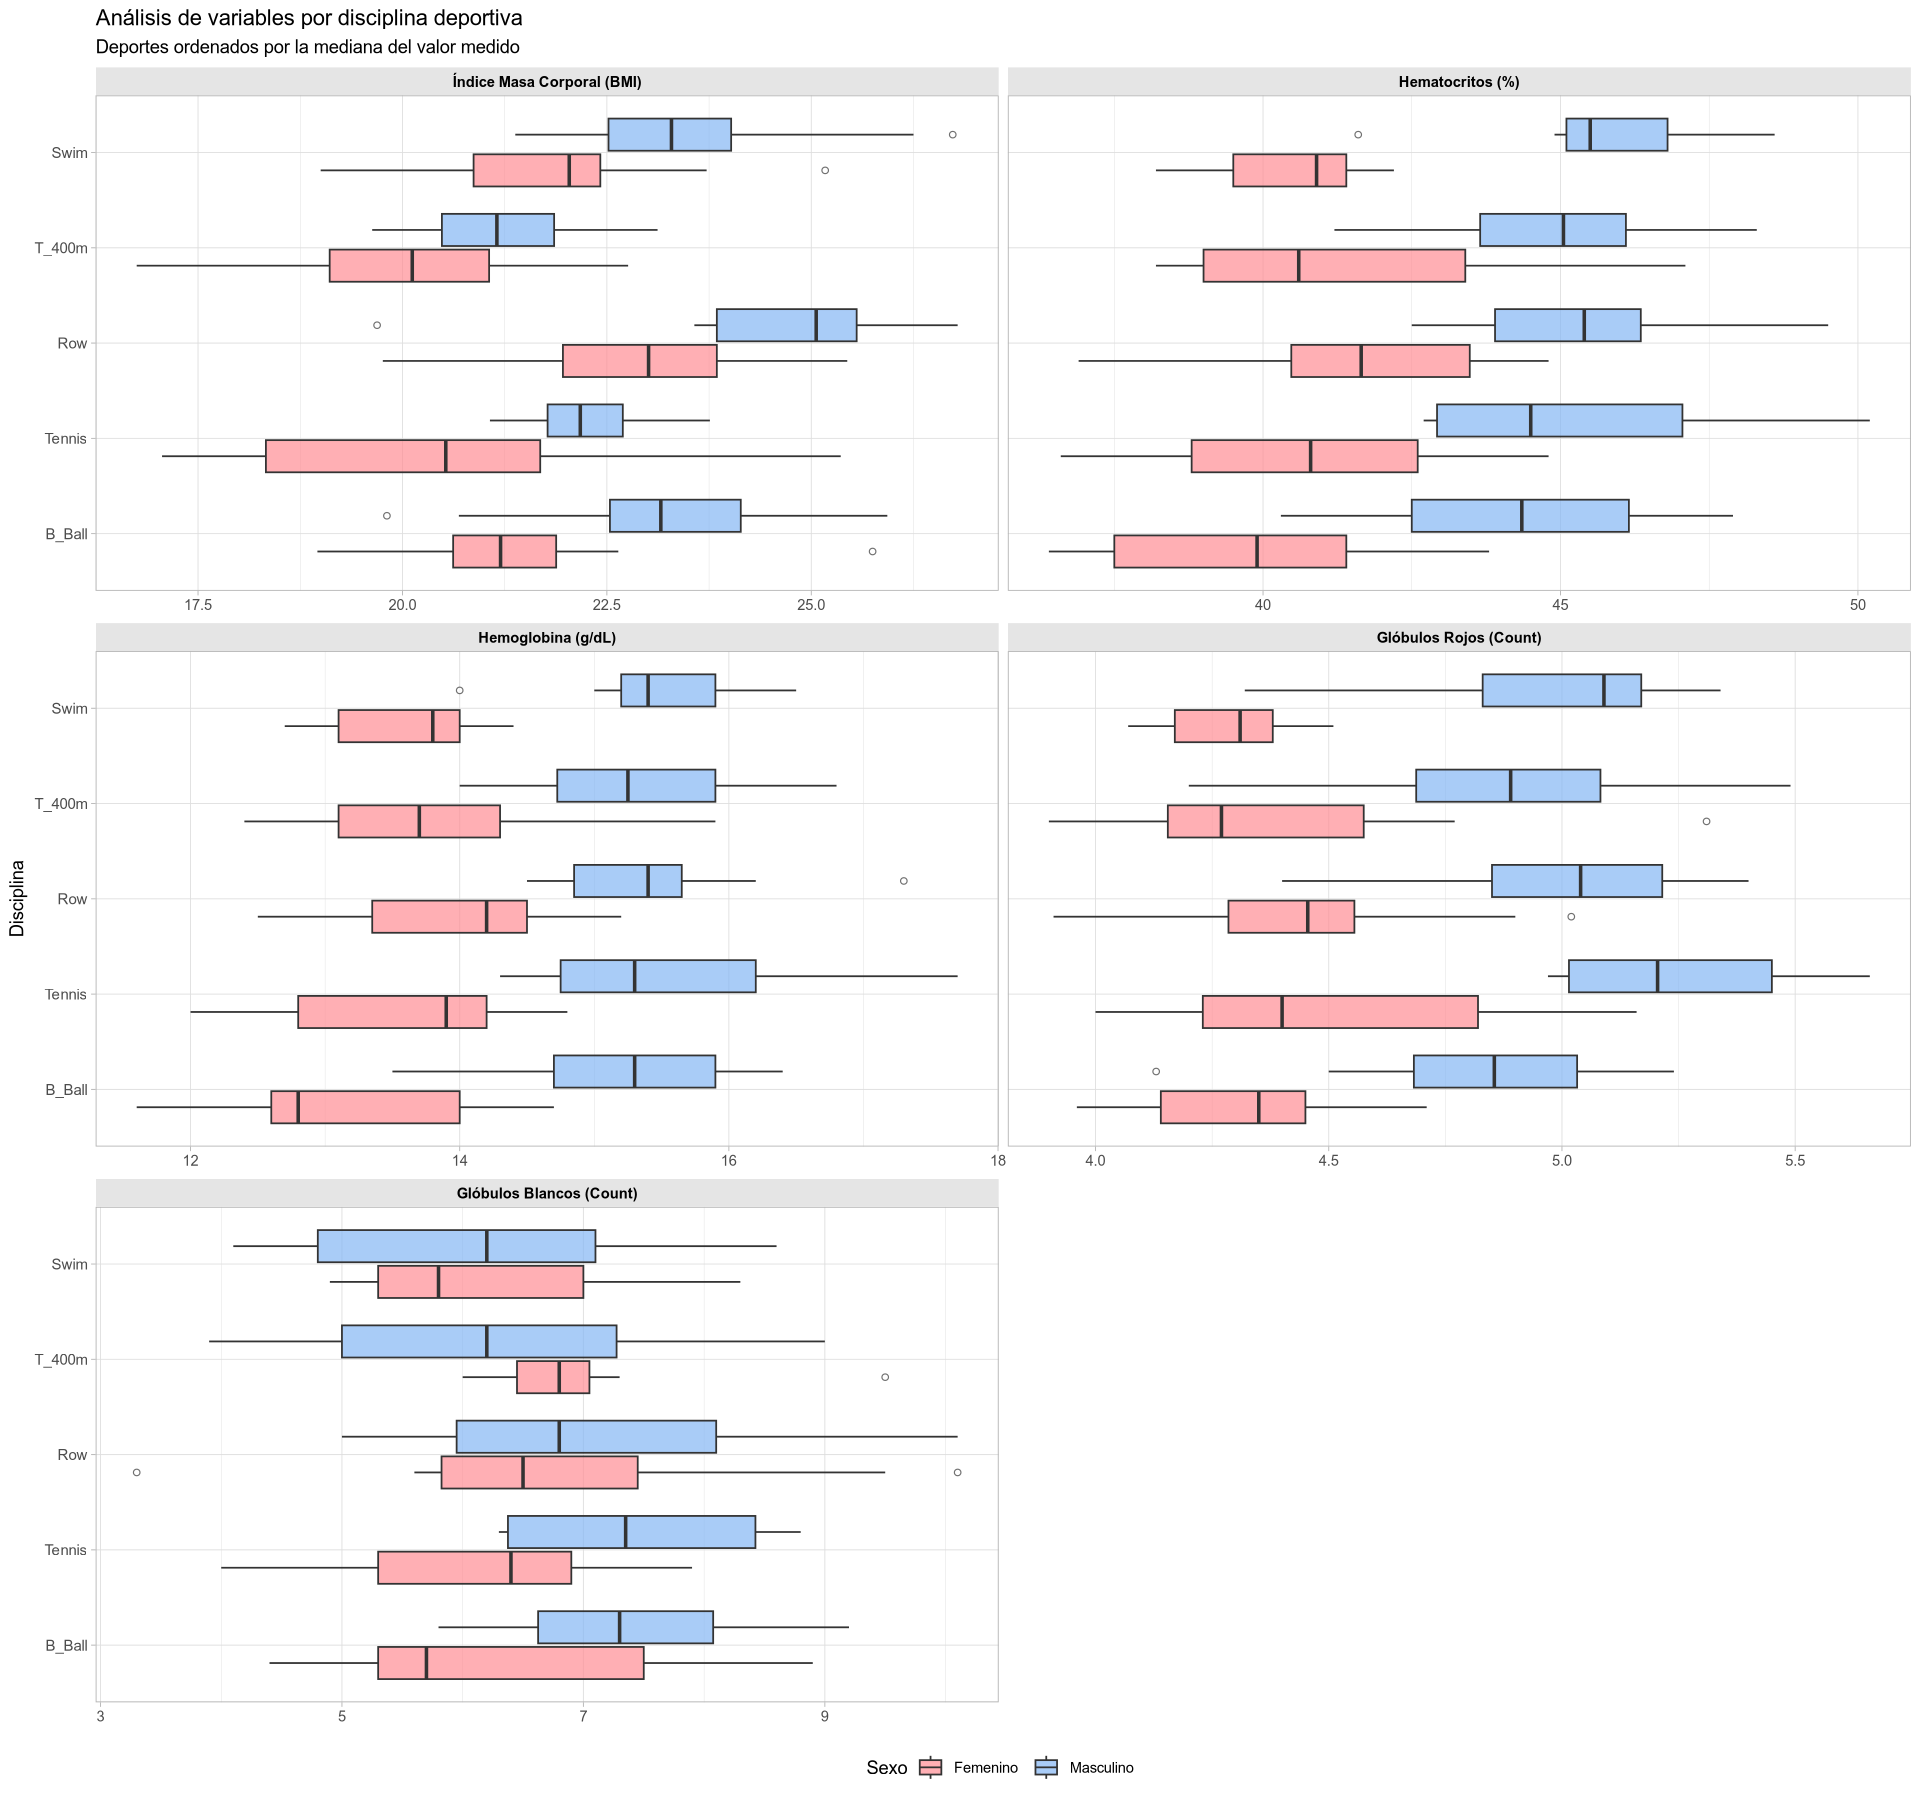

In [11]:
data_long <- data_ais |>
  pivot_longer(
    cols = c(rcc, wcc, hc, hg, bmi),
    names_to = "variable",
    values_to = "valor"
  )

nombres_variables_labeller <- as_labeller(c(
  "bmi" = "Índice Masa Corporal (BMI)",
  "hc"  = "Hematocritos (%)",
  "hg"  = "Hemoglobina (g/dL)",
  "rcc" = "Glóbulos Rojos (Count)",
  "wcc" = "Glóbulos Blancos (Count)"
))

ggplot(data_long, aes(
  x = reorder(sport, valor, FUN = median),
  y = valor, fill = sex
)) +
  geom_boxplot(alpha = 0.7, outlier.shape = 21, outlier.fill = "white") +
  scale_fill_manual(
    values = c("f" = "#FF8C94", "m" = "#84B6F4"),
    name = "Sexo", labels = c("Femenino", "Masculino")
  ) +
  coord_flip() +
  facet_wrap(~variable,
    scales = "free_x",
    labeller = nombres_variables_labeller, ncol = 2
  ) +
  labs(
    title = "Análisis de variables por disciplina deportiva",
    subtitle = "Deportes ordenados por la mediana del valor medido",
    x = "Disciplina",
    y = NULL
  ) +
  theme_light() +
  theme(
    strip.text = element_text(face = "bold", color = "black"),
    strip.background = element_rect(fill = "gray90"),
    legend.position = "bottom",
    axis.text.y = element_text(size = 9)
  )

#### 1. Variables Hematológicas (`hc`, `hg`, `rcc`):
* Lo más evidente al mirar los paneles de la derecha (Hematocritos, Hemoglobina, Glóbulos Rojos) es la separación casi perfecta entre sexos.
* En todos los deportes, las cajas del sexo masculino están desplazadas hacia la derecha respecto a las cajas de las mujeres.
* Podemos interpretar que existe un dimorfismo sexual estricto. El deporte no elimina esta diferencia, un hombre que corre 400m tiene más hemoglobina que una mujer que corre 400m. Las cajas apenas se solapan, lo que indica que son dos poblaciones fisiológicamente distintas en cuanto a capacidad de transporte de oxígeno.

#### 2. Morfología (`bmi`): 
* En el panel de Índice de Masa Corporal, la historia es diferente. Aquí el escalón entre sexos es menor y el tipo de deporte juega un papel crucial.
* Comparación entre deportes:
    * Si observamos `Row`: Las cajas están muy a la derecha (valores altos de BMI, entre 23 y 27). Esto es lógico, ya que el remo requiere gran masa muscular y potencia.
    * Si observamos `T_400m`: Las cajas están más a la izquierda (valores bajos de BMI, alrededor de 20-22). 
* Aunque los hombres tienden a tener un BMI ligeramente mayor, la disciplina deportiva es un predictor muy fuerte. Una mujer que hace remo tiene un BMI promedio superior a un hombre corredor de 400m. Aquí, la exigencia del deporte pesa más que el género.

#### 3. Glóbulos Blancos (`wcc`): 
* El panel inferior izquierdo rompe con los patrones anteriores.
* Las cajas rosas y azules están muy mezcladas. No hay una "zona de hombres" y una "zona de mujeres" clara.
* Variabilidad (Anchura de las cajas):
    * Fijándonos en `Row`: Las cajas son muy anchas (especialmente la azul). Esto indica que dentro del equipo de remo hay deportistas con niveles normales y otros con niveles muy altos.
    * Fijándonos en `Tennis`: Las cajas son más compactas y están situadas más a la izquierda (valores más bajos).
* El conteo de glóbulos blancos parece responder al estrés fisiológico del deporte o a variaciones individuales, no al sexo. El remo, siendo un deporte extenuante, muestra rangos más altos y dispersos (coincidiendo con los outliers que identificamos antes), mientras que deportes más técnicos o intermitentes como el tenis muestran valores basales más bajos.

> *"En resumen la estratificación por deporte revela que la morfología de los atletas (BMI) está fuertemente condicionada por la disciplina: los deportes de potencia como el Row presentan los valores más altos, mientras que los de velocidad en pista (T_400m) los más bajos. Por el contrario, los parámetros hematológicos (hg, hc, rcc) mantienen un dimorfismo sexual estricto independientemente del deporte practicado (hombres > mujeres). Finalmente, los leucocitos (wcc) muestran valores atípicos notables en disciplinas de alta exigencia metabólica, sin distinción clara de género."*

Ahora siguiendo el paso anterior vamos a ver cuales son los outliers de estos boxplots que ya hay mas: 

In [12]:
outliers_detectados <- data_ais |>
  mutate(row_id = row_number()) |>
  pivot_longer(
    cols = c(rcc, wcc, hc, hg, bmi),
    names_to = "variable",
    values_to = "valor"
  ) |>
  group_by(variable, sport, sex) |>
  mutate(
    Q1 = quantile(valor, 0.25, na.rm = TRUE),
    Q3 = quantile(valor, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    limite_inferior = Q1 - 1.5 * IQR,
    limite_superior = Q3 + 1.5 * IQR,
    es_outlier = valor < limite_inferior | valor > limite_superior
  ) |>
  filter(es_outlier) |>
  arrange(variable, sport, sex) |>
  select(row_id, sport, sex, variable, valor, limite_inferior, limite_superior)

print(outliers_detectados)

# A tibble: 14 × 7
# Groups:   variable, sport, sex [13]
   row_id sport  sex   variable valor limite_inferior limite_superior
    <int> <fct>  <fct> <chr>    <dbl>           <dbl>           <dbl>
 1     11 B_Ball f     bmi      25.8            18.7            23.8 
 2    102 B_Ball m     bmi      19.8            20.1            26.5 
 3     83 Row    m     bmi      19.7            21.3            28.1 
 4     39 Swim   f     bmi      25.2            18.5            24.7 
 5     75 Swim   m     bmi      26.7            20.3            26.3 
 6     75 Swim   m     hc       41.6            42.6            49.3 
 7     84 Row    m     hg       17.3            13.7            16.8 
 8     75 Swim   m     hg       14              14.2            17.0 
 9     99 B_Ball m     rcc       4.13            4.16            5.56
10     24 Row    f     rcc       5.02            3.88            4.96
11     45 T_400m f     rcc       5.31            3.53            5.20
12     22 Row    f     wcc       

> *"El análisis de valores atípicos nos permite identificar perfiles funcionales específicos dentro de los deportes. Se detecta la probable presencia de un timonel en el equipo de remo masculino (ID 83) debido a un BMI significativamente bajo (19.7) incompatible con la morfología de un remero de potencia. Asimismo, se observa un caso de perfil hematológico bajo en un nadador (ID 75), contrastando con la remera (ID 84) y la velocista (ID 45) que presentan valores excepcionalmente altos de hemoglobina y eritrocitos, sugiriendo una capacidad aeróbica superior."*

Mirando las dos entradas de antes detectadas como "outliers", y al solo aparecer ahora la entrada de la mujer (32) miramos porqué:

In [13]:
data_ais |>
  filter(sport == "Row", sex == "m") |>
  summarise(
    Q3 = quantile(wcc, 0.75),
    IQR = IQR(wcc),
    limite_superior = Q3 + 1.5 * IQR,
    valor_maximo_sujeto = max(wcc)
  )

Q3,IQR,limite_superior,valor_maximo_sujeto
<dbl>,<dbl>,<dbl>,<dbl>
8.1,2.15,11.325,10.1


Aquí obtenemos un hallazgo revelador al examinar el valor máximo de glóbulos blancos (wcc = 10.1), compartido por dos atletas de remo (un hombre y una mujer). Aunque numéricamente idénticos, estadísticamente solo el caso femenino constituye un outlier, siendo el único que aparece visualmente marcado fuera de los bigotes del diagrama de caja.

Esta discrepancia se debe a los umbrales de distribución de cada sexo: mientras que el valor 10.1 supera el límite superior de normalidad calculado para las mujeres (9.89), se mantiene dentro del rango aceptable para los hombres (cuyo límite se extiende hasta 11.32). Esto confirma que la mayor dispersión fisiológica del grupo masculino 'absorbe' este valor dentro de su normalidad, mientras que en el grupo femenino destaca como una anomalía significativa.

Entonces antes teníamos razón inicialmente y solo veíamos un outlier en el boxplot, no dos. 

--- 

Una vez completado el análisis visual, donde hemos detectado patrones claros de dimorfismo sexual y diferencias por disciplina, procederemos a verificar estadísticamente estas observaciones. Para ello, calcularemos la matriz de correlaciones, que nos ayudará a entender cómo interactúan las distintas métricas fisiológicas entre sí (por ejemplo, la relación entre masa corporal y parámetros sanguíneos).

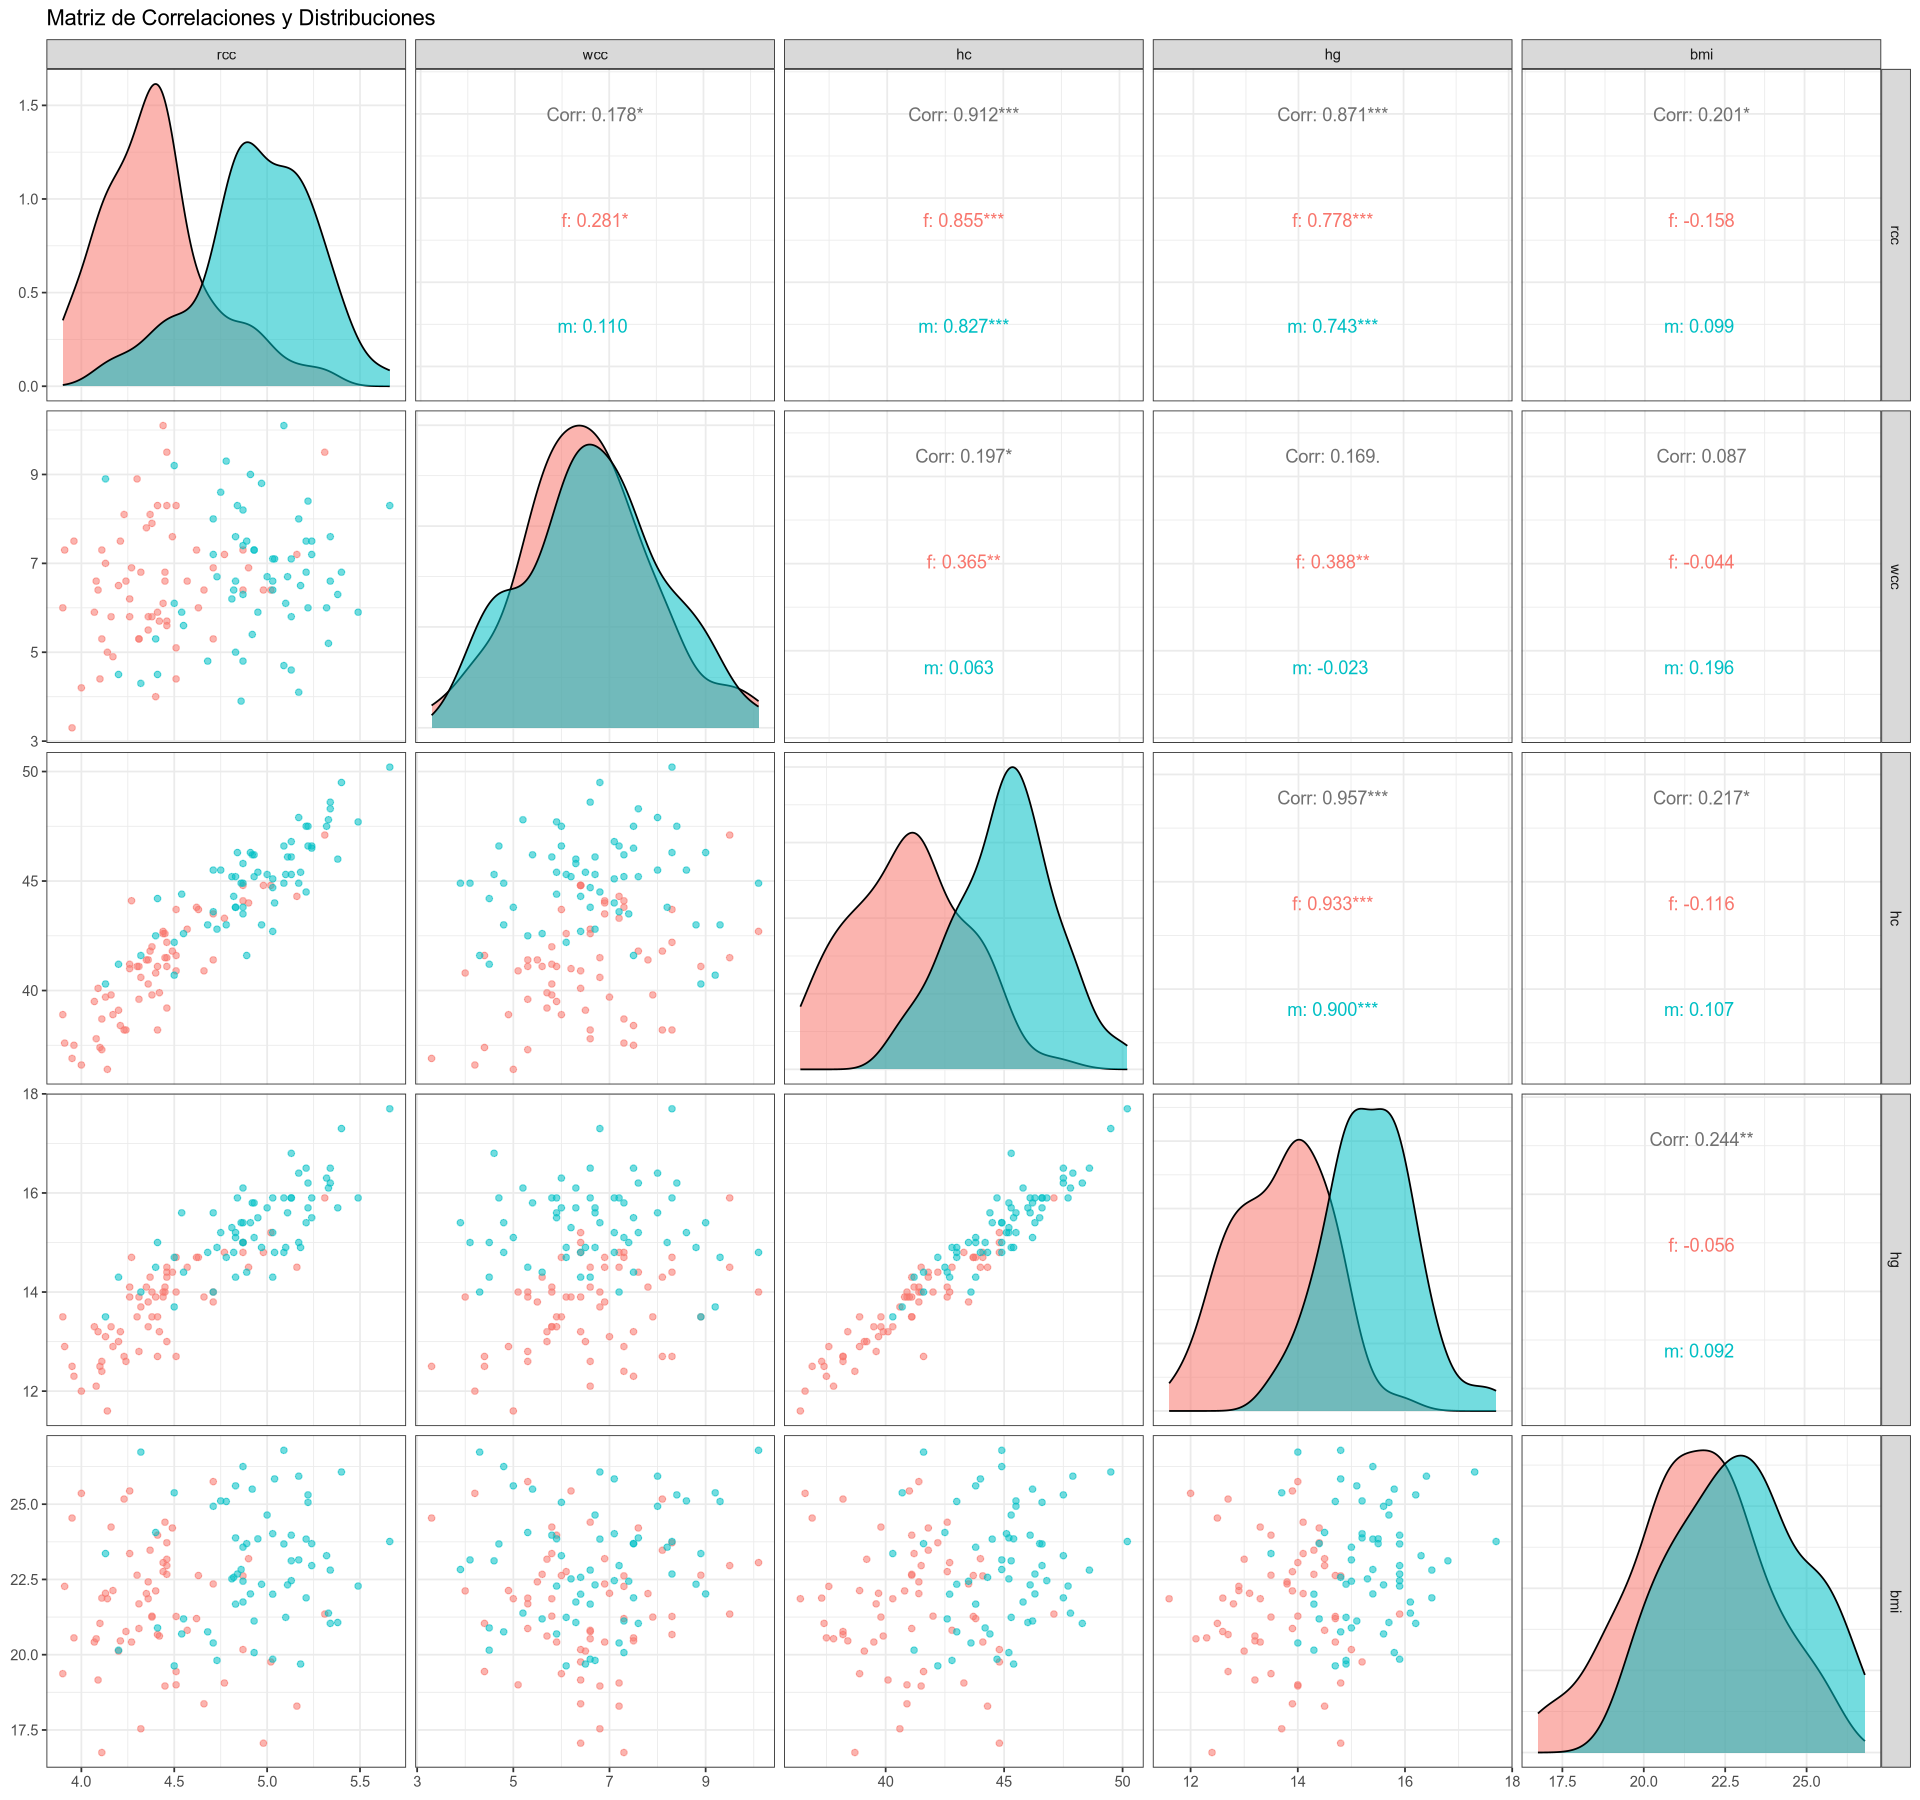

In [14]:
ggpairs(data_ais,
  columns = c("rcc", "wcc", "hc", "hg", "bmi"),
  aes(color = sex, alpha = 0.5),
  title = "Matriz de Correlaciones y Distribuciones"
) +
  theme_bw()

#### 1. La Triada Sanguínea y la Multicolinealidad:
* Lo más destacado son los cruces entre `rcc`, `hc` y `hg`. En los gráficos de dispersión de la parte inferior, los puntos forman líneas diagonales casi perfectas y muy estrechas. Numéricamente, los coeficientes de correlación en la parte superior son muy altos (0.871, 0.912 y 0.957). Esto confirma que estas tres variables son redundantes: miden biológicamente el mismo concepto (capacidad de transporte de oxígeno). Desde el punto de vista estadístico, esto demuestra que rcc, hc y hg comparten la inmensa mayoría de su varianza, comportándose como indicadores redundantes de un mismo fenómeno fisiológico, esto implica que no se deberían usar juntas en un modelo predictivo futuro, sino elegir solo una para evitar inestabilidad matemática.
* En nuestro ejercicio no nos afecta técnicamente esta multicolinealidad. Es un problema grave cuando utilizamos múltiples variables predictoras para intentar explicar una variable respuesta en el mismo modelo. Sin embargo, el ANOVA (tanto one-way como two-way) funciona de forma univariante en la variable respuesta, por lo tanto no eliminaremos ninguna variable, ya que no realizamos ningún modelo.
* Aunque posteriormente hacer el test para las tres es conceptualmente repetitivo. Dado que rcc, hc y hg tienen una correlación del 90-95%, los resultados que obtengamos en los tres ANOVAs van a ser prácticamente idénticos (si sale significativo en uno, saldrá en los tres. En los siguientes pasos lo confirmaremos.

#### 2. Separación por Sexo en los Gráficos de Dispersión:
* Al haber coloreado por sexo, en los gráficos de dispersión vemos claramente dos nubes de puntos distintas. Generalmente, la nube azul (hombres) se sitúa más arriba y a la derecha que la roja (mujeres) en las variables sanguíneas. Esto valida visualmente que, aunque la correlación lineal es idéntica para ambos (si suben los glóbulos rojos, sube proporcionalmente la hemoglobina), los hombres operan en un rango de valores fisiológicos superior.

#### 3. La Independencia de los Glóbulos Blancos:
* La fila y columna correspondientes a wcc se comportan de forma muy distinta al resto. Los coeficientes de correlación con las otras variables son muy bajos, cercanos a cero. Visualmente, las nubes de puntos son difusas y circulares, sin una dirección diagonal clara. Esto indica que el sistema inmunológico funciona de manera independiente a la capacidad aeróbica o al tamaño corporal (BMI).


> *"En resumen la matriz de correlaciones revela una fuerte multicolinealidad entre las variables hematológicas (`rcc`, `hc`, `hg`), con coeficientes cercanos a la unidad, lo que indica que aportan información redundante. Por el contrario, el conteo de leucocitos (`wcc`) muestra una independencia estructural, presentando correlaciones casi nulas con el resto de métricas. Finalmente, la estratificación por sexo confirma que, aunque las relaciones lineales se mantienen estables en ambos géneros (las pendientes son similares), los hombres se agrupan sistemáticamente en rangos de valores superiores."*

## <font color='#3d59c6'>  1.1 Verificación de supuestos </font>

Ahora procedemos a verificar matemáticamente si podemos fiarnos de los futuros tests.

Antes de lanzar el ANOVA, necesitamos probar formalmente:
1.  Normalidad: Test de Shapiro-Wilk + QQ Plot.
2.  Homocedasticidad: Test de Bartlett + Boxplots de residuos.

Primero comprobamos la Normalidad mediante el Test de Shapiro-Wilk y los Q-Q Plots, tal y como hemos hecho hasta ahora.

#### Verificación de Supuestos: Normalidad


Resultados Test de Normalidad (Shapiro-Wilk)
  Variable      W p_value Conclusion
1      rcc 0.9738 0.01624  NO Normal
2      wcc 0.9924 0.74161     Normal
3       hc 0.9871 0.29426     Normal
4       hg 0.9921 0.71385     Normal
5      bmi 0.9921 0.70766     Normal


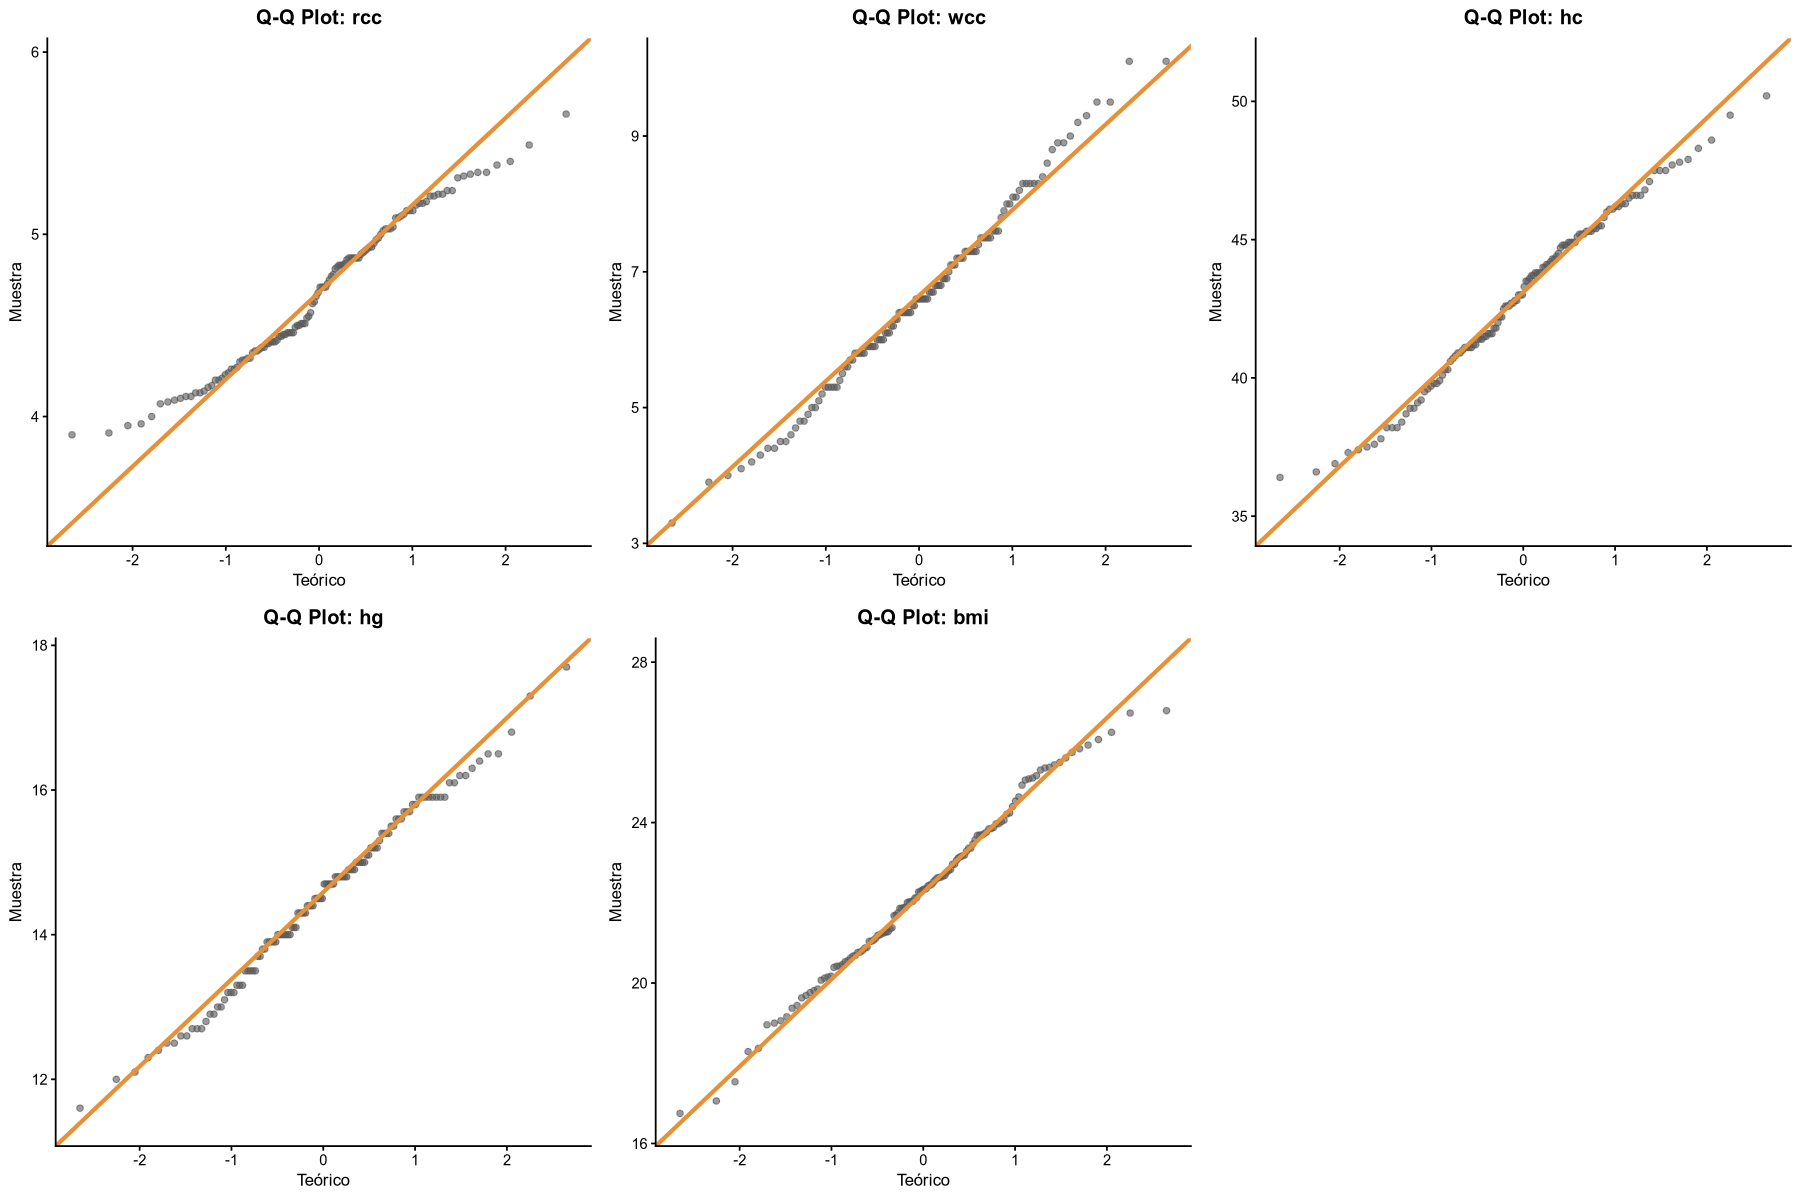

In [15]:
vars_numericas <- c("rcc", "wcc", "hc", "hg", "bmi")

qq_plots <- list()
resultados_shapiro <- data.frame(
  Variable = character(), W = numeric(),
  p_value = numeric(), Conclusion = character(), stringsAsFactors = FALSE
)

for (variable in vars_numericas) {
  p <- ggplot(data_ais, aes(sample = .data[[variable]])) +
    stat_qq(color = "#595959", size = 1.5, alpha = 0.6) +
    stat_qq_line(color = "#e69138", lwd = 1.2) +
    labs(
      title = paste("Q-Q Plot:", variable),
      x = "Teórico",
      y = "Muestra"
    ) +
    theme_classic() +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
      axis.title = element_text(size = 10)
    )

  qq_plots[[length(qq_plots) + 1]] <- p

  test <- shapiro.test(data_ais[[variable]])

  conclusion <- ifelse(test$p.value > 0.05, "Normal", "NO Normal")

  resultados_shapiro[nrow(resultados_shapiro) + 1, ] <- c(
    variable,
    round(test$statistic, 4),
    sprintf("%.5f", test$p.value),
    conclusion
  )
}

options(repr.plot.width = 15, repr.plot.height = 10)
grid.arrange(grobs = qq_plots, ncol = 3)

cat("\nResultados Test de Normalidad (Shapiro-Wilk)\n")
print(resultados_shapiro)

Primero de todo observando los p-valores y los gráficos QQ-Plot obtenidos para cada variable podemos concluir:
* Variables Normales (p > 0.05): Las variables `wcc`, `hc`, `hg` y `bmi` presentan p-valores altos, por lo que aceptamos la normalidad de sus distribuciones.
* Variable No Normal (p < 0.05): La variable `rcc` presenta un p-valor de 0.016, rechazando estrictamente la normalidad estadística. También se puede comprobar en el gráfico como sus dos extremos se van mucho de la linea central.

> A pesar de que `rcc` no cumple estrictamente el criterio de Shapiro-Wilk, disponemos de un tamaño muestral total de N = 124 observaciones. Por lo tanto según el Teorema del Límite Central, cuando el tamaño de la muestra es suficientemente grande (normalmente n > 30), la distribución de la media muestral tiende a aproximarse a la normalidad, independientemente de la forma de la distribución original de los datos. Dado que el ANOVA trabaja comparando medias y es un test robusto ante desviaciones moderadas de la normalidad con muestras grandes, podemos asumir que este supuesto no invalida el análisis y procedemos con no quitarlo del estudio.

### Verificación de Supuestos: Homocedasticidad 
Para validar el supuesto de homocedasticidad, necesario para el análisis ANOVA, hemos optado por una estrategia visual adaptada a la naturaleza categórica de nuestros predictores (Deporte y Sexo), complementada con una prueba estadística formal.

#### 1. Análisis Visual: Por qué Boxplots de Residuos?
* Habitualmente, la homocedasticidad se verifica mediante un gráfico de dispersión de Valores Ajustados vs. Residuos. Sin embargo, en el contexto de un ANOVA donde las variables independientes son factores cualitativos (categorías), este gráfico estándar resulta poco informativo, ya que los puntos se agrupan en columnas verticales correspondientes a la media de cada grupo, dificultando la comparación visual de la dispersión.

Por este motivo, hemos sustituido el gráfico de dispersión clásico por Boxplots de los Residuos agrupados por factor.
* El Boxplot nos permite comparar directamente la variabilidad (anchura de la caja y longitud de los bigotes) entre los diferentes grupos.
* Si las "cajas" de los residuos para cada deporte o sexo tienen alturas similares, asumimos visualmente que las varianzas son constantes (homocedasticidad). Si observamos cajas muy comprimidas junto a otras muy expandidas, existen indicios de heterocedasticidad.

#### 2. Validación Estadística: Test de Bartlett
Para confirmar objetivamente y darle mas rigurosidad en lo que veremos en los gráficos, aplicamos el Test de Bartlett. Seleccionamos esta prueba específica porque es la más potente cuando los datos provienen de una distribución normal (o cercana a ella).

  * Hipótesis Nula ($H_0$): Las varianzas de todos los grupos son iguales ($\sigma_1^2 = \sigma_2^2 = ... = \sigma_k^2$).
  * Hipótesis Alternativa ($H_1$): Al menos una de las varianzas es diferente.
  * Si el *p-value* \> 0.05, no rechazamos $H_0$ y asumimos que se cumple el supuesto de homocedasticidad.

Variable: rcc   | p-value = 0.60556 -> Varianzas Iguales
Variable: wcc   | p-value = 0.91510 -> Varianzas Iguales
Variable: hc    | p-value = 0.65375 -> Varianzas Iguales
Variable: hg    | p-value = 0.27521 -> Varianzas Iguales
Variable: bmi   | p-value = 0.36626 -> Varianzas Iguales


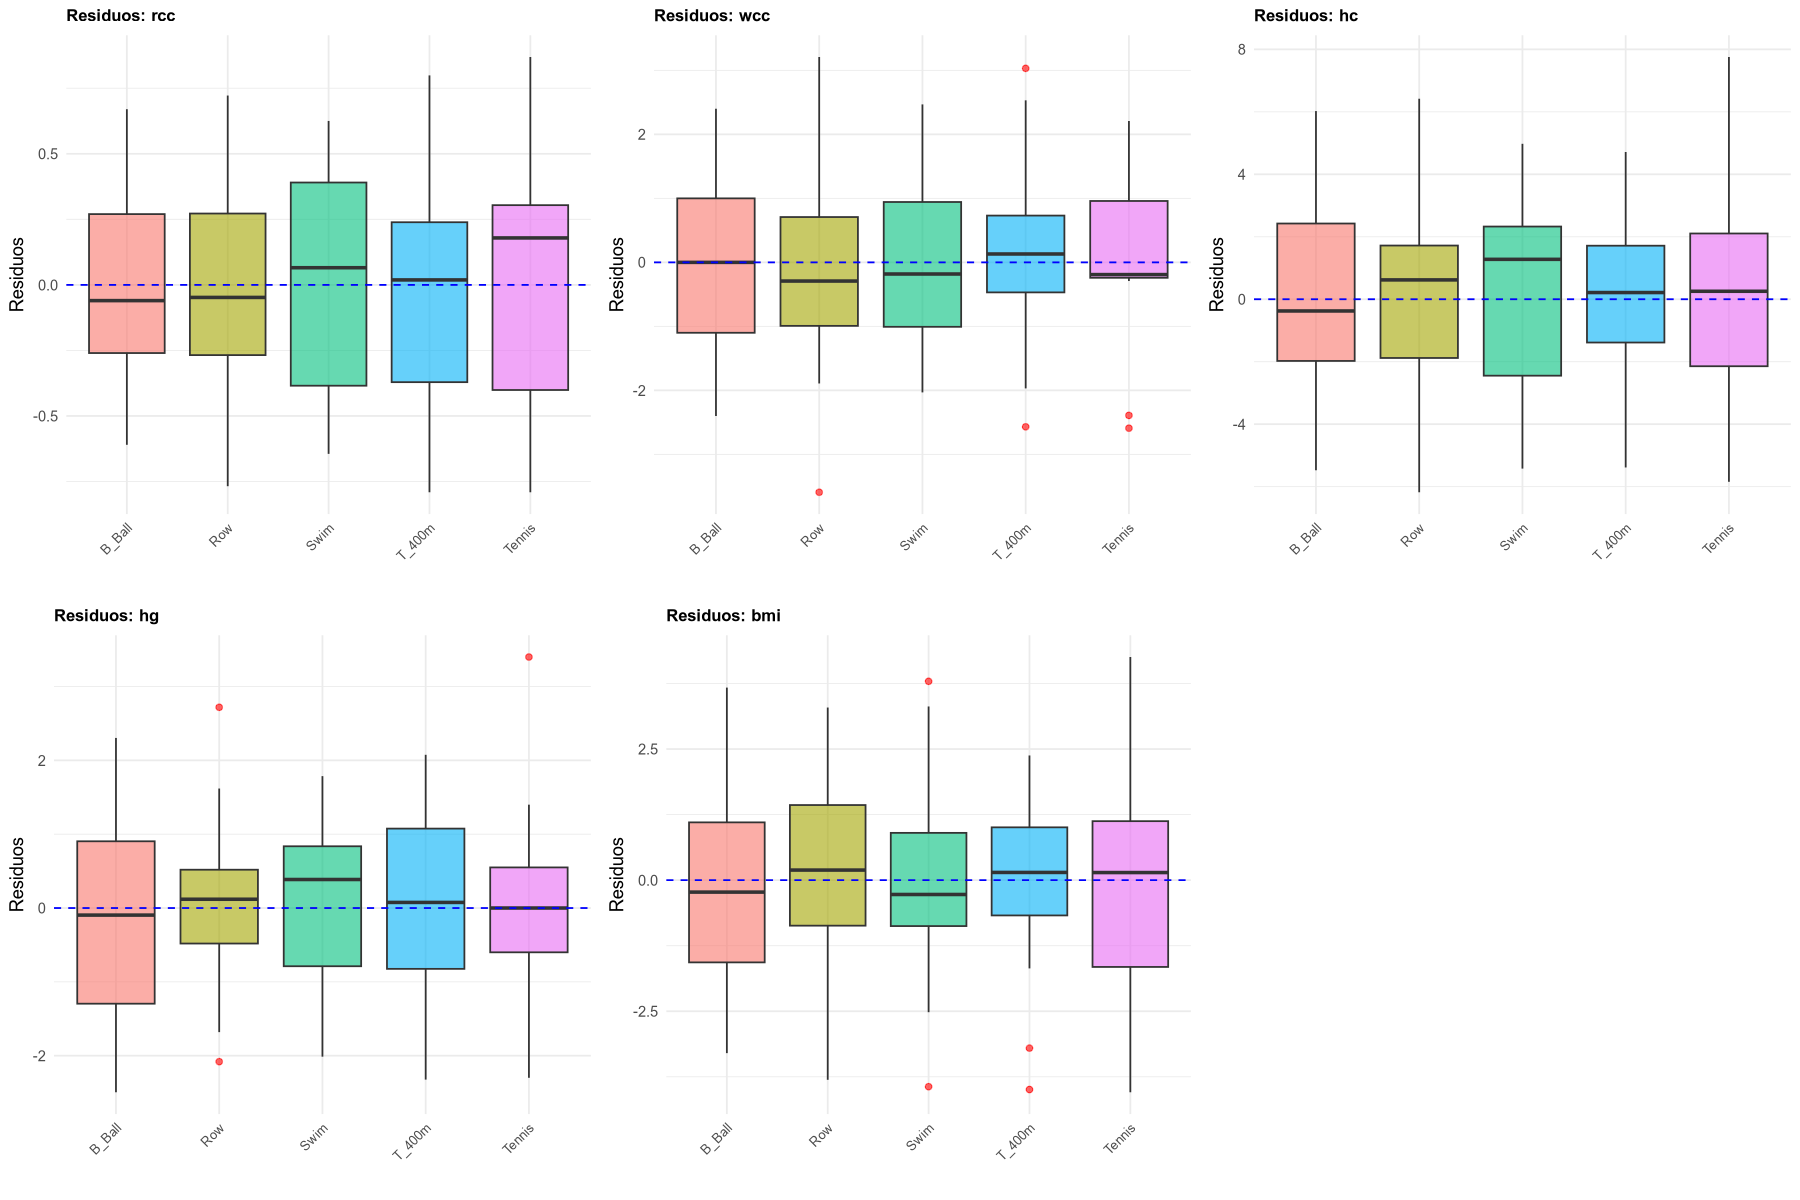

In [16]:
vars_numericas <- c("rcc", "wcc", "hc", "hg", "bmi")
graficos_residuos <- list()

for (var in vars_numericas) {
  modelo <- aov(data_ais[[var]] ~ data_ais$sport)

  res_bartlett <- bartlett.test(data_ais[[var]] ~ data_ais$sport)

  cat(sprintf(
    "Variable: %-5s | p-value = %.5f -> %s\n",
    var,
    res_bartlett$p.value,
    ifelse(res_bartlett$p.value > 0.05,
      "Varianzas Iguales", "Varianzas Distintas"
    )
  ))

  modelo <- aov(data_ais[[var]] ~ data_ais$sport)

  df_residuos <- data.frame(
    Deporte = data_ais$sport,
    Residuos = residuals(modelo)
  )

  p <- ggplot(df_residuos, aes(x = Deporte, y = Residuos, fill = Deporte)) +
    geom_boxplot(alpha = 0.6, outlier.colour = "red") +
    geom_hline(yintercept = 0, linetype = "dashed", color = "blue") +
    labs(title = paste("Residuos:", var), x = "", y = "Residuos") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
      legend.position = "none",
      plot.title = element_text(size = 10, face = "bold")
    )

  graficos_residuos[[length(graficos_residuos) + 1]] <- p
}

options(repr.plot.width = 15, repr.plot.height = 10)
grid.arrange(grobs = graficos_residuos, ncol = 3)

#### Interpretación de la Homocedasticidad:
> Los resultados del Test de Bartlett confirman el cumplimiento estricto del supuesto de igualdad de varianzas para todas las variables dependientes analizadas. En todos los casos, el *p-value* obtenido es considerablemente superior al nivel de significación ($\alpha = 0.05$):
>
> * Variables Hematológicas: Se observa una homogeneidad notable en `rcc` ($p=0.61$), `hc` ($p=0.65$) y `hg` ($p=0.28$).
> * `wcc`: Presentan la mayor estabilidad de varianza entre grupos ($p=0.92$), lo que indica una dispersión extremadamente constante independientemente del deporte.
> * `bmi`: También cumple el supuesto ($p=0.37$).
>
> Al no rechazar la Hipótesis Nula ($H_0$) de igualdad de varianzas, validamos la robustez del modelo ANOVA para este conjunto de datos. Esto nos permite proceder con la comparación de medias con la garantía de que las diferencias detectadas se deberán a cambios en la magnitud central (medias) y no a artefactos provocados por dispersiones desiguales.

En resumen tenemos:

1.  Robustez ante la "No Normalidad": Antes vimos que el test de Shapiro-Wilk (Normalidad) solía fallar porque tenías muchos datos. El ANOVA es muy "fuerte" y aguanta bien que los datos no sean normales, siempre y cuando las varianzas sean iguales. Como acabas de demostrar que las varianzas SON iguales, tu ANOVA será válido aunque la normalidad no fuera perfecta.
2.  Boxplots visualmente coherentes: Esto implica que en los gráficos de residuos que has generado, las "cajas" deberían tener alturas muy parecidas (ninguna caja es aplastante más grande que las otras).

Ahora que hemos verificado los supuestos, tenemos luz verde para ejecutar el test ANOVA y ver quién es diferente de quién.

## <font color='#3d59c6'>  2. Test ANOVA One-Way </font>

Para hace el test ANOVA One-Way elegimos las variables: `bmi` (Índice de Masa Corporal) y `hg` (Hemoglobina):
* Usando estas dos evitamos la Redundancia (Multicolinealidad): Como vimos en la matriz de correlaciones, hg, hc y rcc miden casi lo mismo. Elegimos solo hg porque és la variable más representativa de la capacidad aeróbica sin repetir análisis innecesarios.

Y elegimos estas dos también porqué son dos contrastes muy diferentes:
* `hg` (Fisiología): Esperamos una separación muy clara por sexo (dimorfismo fuerte), casi sin solapamiento.
* `bmi` (Morfología): Es una variable "más sucia" o mezclada. Aunque los hombres tienden a tener más masa, hay muchas mujeres atletas con mayor BMI que hombres delgados (como vimos con los de `row`). Aquí el ANOVA es más interesante porque la diferencia no es tan obvia a simple vista.

#### 1. Histograma Superpuesto:
Antes de lanzar el test estadístico (que solo nos da un número, el p-valor), es fundamental entender la magnitud visual de la diferencia:
* Así podemos visualizar el Solapamiento (Overlap): El ANOVA nos dirá "son diferentes", pero este gráfico nos dice cuánto se parecen.
    * Si las áreas roja y azul están separadas (como dos montañas distantes), la diferencia es enorme.
    * Si están una encima de la otra, la diferencia es sutil.
* Por otro lado las líneas discontinuas (medianas) nos permiten ver al instante qué grupo tiene el valor central más alto y si esa distancia justifica un test estadístico.

1. Histograma de BMI (Morfología):
Esperamos ver solapamiento. Hombres y mujeres compartimos rangos de masa corporal similares, aunque las medias estén desplazadas. El ANOVA nos dirá si ese pequeño desplazamiento es real o azaroso.
2. Histograma de HG (Fisiología):
Esperamos ver separación (dimorfismo). Es probable que las "montañas" (distribuciones) roja y azul estén casi separadas. Esto anticipa un resultado de ANOVA extremadamente significativo (un p-valor minúsculo).

Este paso visual valida que el test estadístico tiene sentido biológico y no es solo un artefacto matemático.

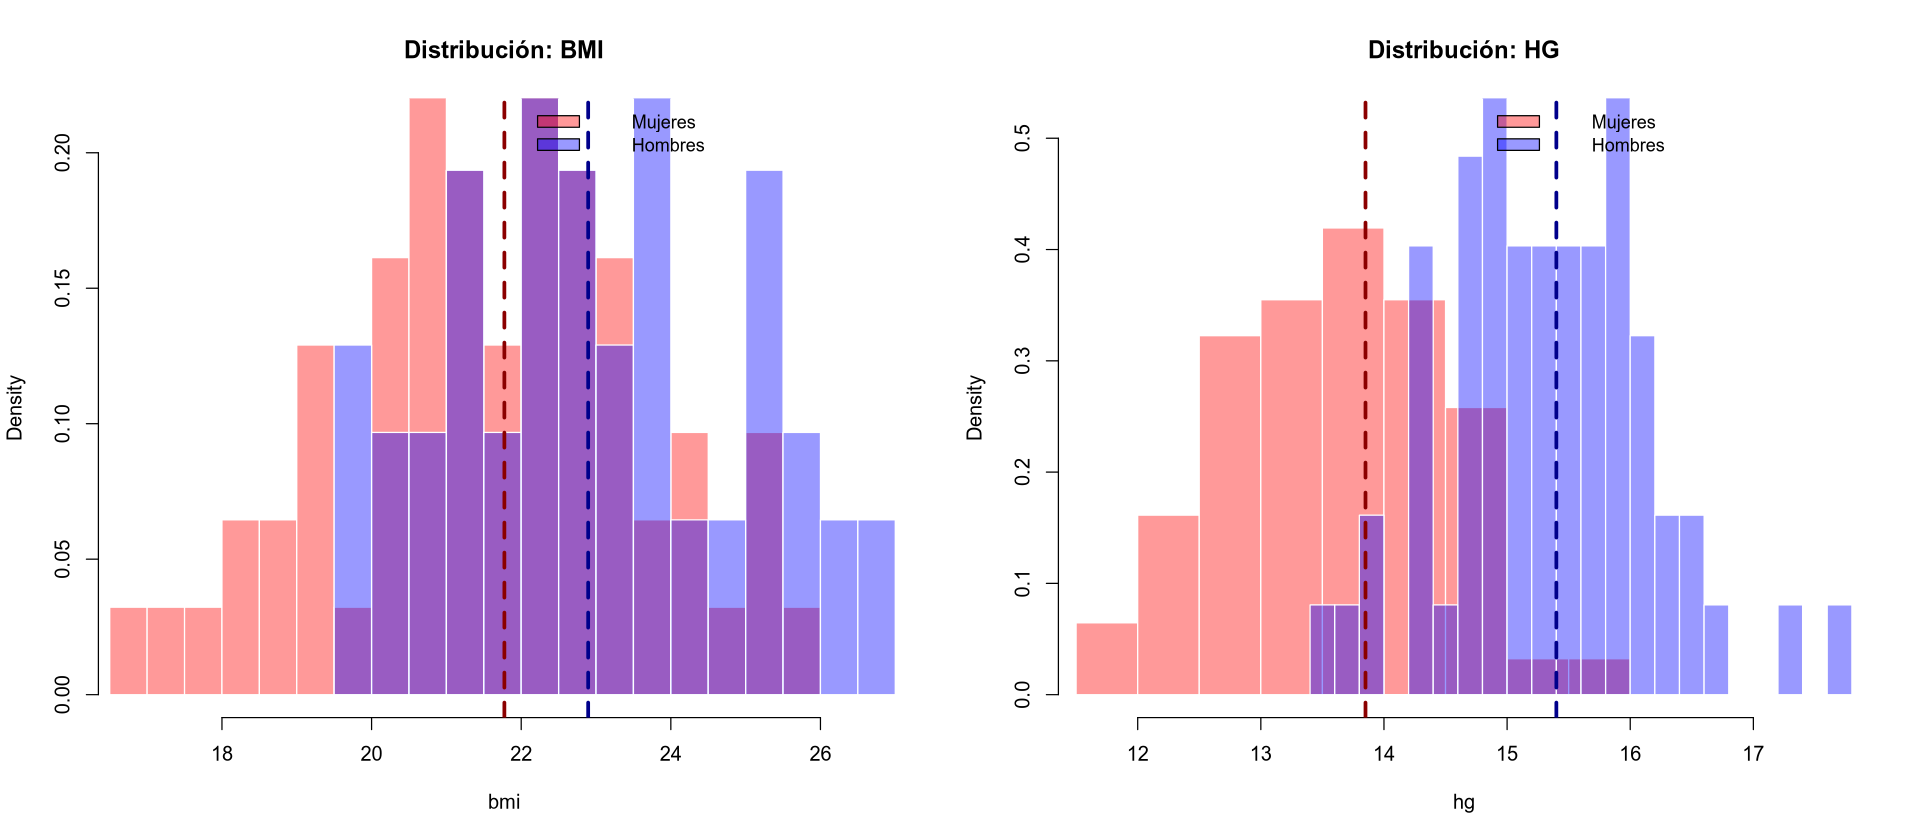

In [17]:
options(repr.plot.width = 16, repr.plot.height = 7)
par(mfrow = c(1, 2))

vars_comparacion <- c("bmi", "hg")

for (var_interes in vars_comparacion) {
  data_f <- subset(data_ais, sex == "f")[[var_interes]]
  data_m <- subset(data_ais, sex == "m")[[var_interes]]

  max_y <- max(
    density(data_f, na.rm = TRUE)$y,
    density(data_m, na.rm = TRUE)$y
  ) * 1.15
  xlims <- range(c(data_f, data_m), na.rm = TRUE)

  hist(data_f,
    col = rgb(1, 0, 0, 0.4),
    main = paste("Distribución:", toupper(var_interes)),
    xlab = var_interes,
    freq = FALSE,
    ylim = c(0, max_y),
    xlim = xlims,
    breaks = 15,
    border = "white"
  )

  hist(data_m,
    col = rgb(0, 0, 1, 0.4),
    add = TRUE,
    freq = FALSE,
    breaks = 15,
    border = "white"
  )

  abline(v = median(data_f, na.rm = TRUE), col = "darkred", lwd = 3, lty = 2)
  abline(v = median(data_m, na.rm = TRUE), col = "darkblue", lwd = 3, lty = 2)

  legend("topright",
    legend = c("Mujeres", "Hombres"),
    fill = c(rgb(1, 0, 0, 0.4), rgb(0, 0, 1, 0.4)),
    bty = "n", cex = 0.9
  )
}

par(mfrow = c(1, 1))

#### 1. Índice de Masa Corporal (BMI): 
* Las curvas roja y azul están muy solapadas. Aunque la "cima" (mediana) de los hombres está ligeramente desplazada hacia la derecha (valores mayores), gran parte del área coloreada coincide.
* Aunque los hombres tienden a tener un índice de masa ligeramente superior, no es una regla universal en este grupo de atletas. Hay muchas mujeres con más masa corporal que algunos hombres (zona compartida).
* El test seguramente dirá que "hay diferencia significativa" (porque matemáticamente las medias no son idénticas), pero el gráfico nos recuerda que la magnitud del efecto es menor. Aquí el género explica menos variación que en el caso de la sangre.

#### 2. Hemoglobina (HG):
* Aquí la historia es distinta. Observamos dos distribuciones claramente separadas. La curva roja (mujeres) está casi totalmente a la izquierda y la azul (hombres) a la derecha, con una zona de intersección mínima.
* Existe un dimorfismo sexual marcado. La capacidad de transporte de oxígeno es fisiológicamente distinta entre sexos.
* Dado que las medias están tan lejos y las varianzas son compactas, el ANOVA detectará una diferencia "gigante". Esperamos un *p-valor* extremadamente bajo ($< 2 \times 10^{-16}$), confirmando que la diferencia no es casualidad.


> *"El análisis visual mediante histogramas de densidad revela dos comportamientos contrastados. En la variable Hemoglobina (hg), se observa una separación casi completa de las distribuciones, evidenciando un fuerte dimorfismo sexual con escaso solapamiento entre grupos. Por el contrario, en el BMI, aunque la tendencia central masculina es superior, existe un área de intersección considerable, lo que sugiere que el género, por sí solo, no determina de forma exclusiva la morfología corporal en esta muestra de deportistas."*

#### 2. Gráficos de violin

Por último antes de realizar el test ANOVA vamos a generar unos gráficos de violín porqué:
* Mientras que el histograma nos daba el solapamiento, el violín nos muestra "dónde está la gente".
* El boxplot blanco que hay dentro nos indica el centro exacto y el 50% central de los datos. Es una referencia visual perfecta dentro de la densidad del violín.

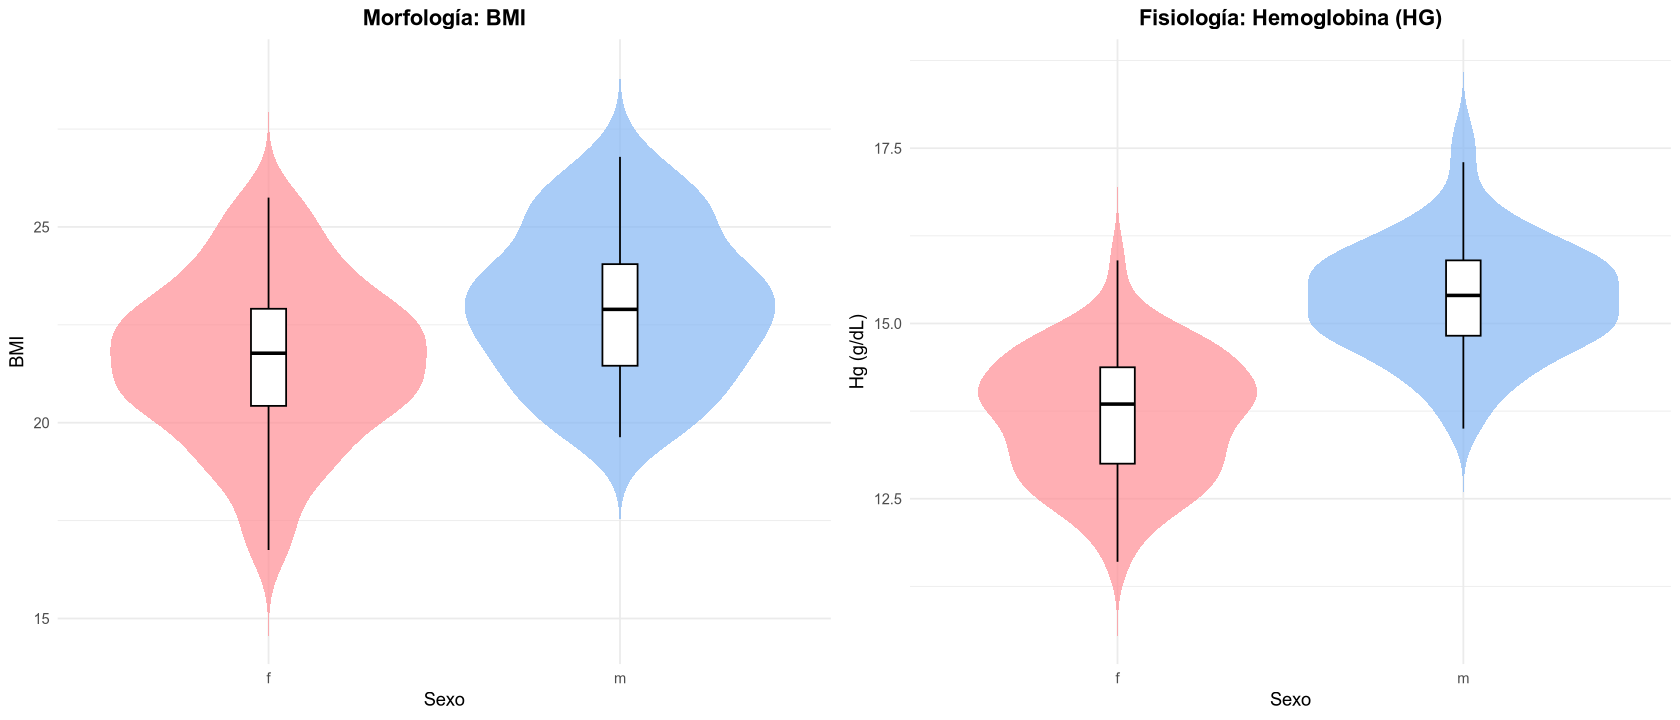

In [18]:
colores_sexo <- c("f" = "#FF8C94", "m" = "#84B6F4")

p_violin_bmi <- ggplot(data_ais, aes(x = sex, y = bmi)) +
  geom_violin(aes(fill = sex), color = NA, trim = FALSE, alpha = 0.7) +
  geom_boxplot(
    width = 0.1, fill = "white", color = "black",
    outlier.shape = NA
  ) +
  scale_fill_manual(values = colores_sexo) +
  labs(title = "Morfología: BMI", x = "Sexo", y = "BMI") +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

p_violin_hg <- ggplot(data_ais, aes(x = sex, y = hg)) +
  geom_violin(aes(fill = sex), color = NA, trim = FALSE, alpha = 0.7) +
  geom_boxplot(
    width = 0.1, fill = "white", color = "black",
    outlier.shape = NA
  ) +
  scale_fill_manual(values = colores_sexo) +
  labs(title = "Fisiología: Hemoglobina (HG)", x = "Sexo", y = "Hg (g/dL)") +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

options(repr.plot.width = 14, repr.plot.height = 6)
grid.arrange(p_violin_bmi, p_violin_hg, ncol = 2)

Los gráficos de violín, al mostrar tanto la distribución (la forma rellena) como la estadística de resumen (el boxplot interno), nos permiten afinar las conclusiones sobre BMI y Hemoglobina (HG) antes de realizar el ANOVA.

#### 1. Índice de Masa Corporal (BMI): Solapamiento y Tendencia
El gráfico de la izquierda muestra una realidad matizada:
* Forma (Densidad): Observamos que la parte más ancha del violín de ambos sexos está casi a la misma altura (alrededor de 22-23). Esto indica que el atleta "típico" hombre y la mujer "típica" tienen un BMI muy similar.
* La diferencia principal está en la cola superior. El violín azul (hombres) se estira más hacia arriba, indicando que los valores más altos de masa corporal corresponden mayoritariamente a hombres. Sin embargo, la gran zona de solapamiento sugiere que el sexo no es un predictor definitivo del BMI.

#### 2. Hemoglobina (HG): Separación Clara (Dimorfismo)
El gráfico de la derecha confirma lo que ya intuíamos, pero con más detalle:
* El cuerpo principal del violín azul está claramente por encima del rosa. Hay muy poco solapamiento entre las partes más anchas de ambos violines.
* El violín azul es más compacto y "gordo" en la parte superior, lo que indica que los hombres tienen valores de hemoglobina consistentemente altos y con menos variabilidad relativa que las mujeres, cuya distribución parece un poco más dispersa hacia abajo.
* En resumen la hemoglobina actúa como un marcador biológico que distingue sexos con gran precisión.

> *"Finalmente la visualización mediante diagramas de violín corrobora la naturaleza distinta de ambas variables. Mientras que el BMI presenta una distribución con un solapamiento sustancial entre sexos, indicando que la masa corporal es una característica compartida con solo una ligera tendencia superior en hombres, la Hemoglobina muestra una estratificación vertical evidente. Las distribuciones de `hg` apenas se superponen en sus rangos intercuartílicos, anticipando una diferencia estadística de gran magnitud en el análisis de varianza posterior."*

Ahora si, después de visualizar los gráficos de violines y el histograma, ya tenemos una intuición de la diferencia que hay. 

Para confirmar esta intuición realizamos el test ANOVA One-Way:

### <font color='#3d59c6'> Test ANOVA One-Way </font>

In [19]:
cat("Resultados del Test ANOVA One-Way\n")
cat("Hipótesis Nula (H0): La media de hombres y mujeres es IGUAL.\n")

modelo_bmi <- aov(bmi ~ sex, data = data_ais)
cat(">>> Variable: BMI\n")
print(summary(modelo_bmi))
cat("\n")

modelo_hg <- aov(hg ~ sex, data = data_ais)
cat(">>> Variable: HG (Hemoglobina)\n")
print(summary(modelo_hg))

Resultados del Test ANOVA One-Way
Hipótesis Nula (H0): La media de hombres y mujeres es IGUAL.
>>> Variable: BMI
             Df Sum Sq Mean Sq F value   Pr(>F)    
sex           1   61.3   61.25   15.38 0.000146 ***
Residuals   122  485.8    3.98                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

>>> Variable: HG (Hemoglobina)
             Df Sum Sq Mean Sq F value Pr(>F)    
sex           1  88.07   88.07   120.2 <2e-16 ***
Residuals   122  89.35    0.73                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Interpretación de Resultados: ANOVA One-Way (Factor: Sexo)

Hemos realizado un análisis de varianza (ANOVA) de un factor para determinar si existen diferencias estadísticamente significativas entre las medias de hombres y mujeres para las variables de morfología (`BMI`) y fisiología (`HG`).

#### 1. Variable: Índice de Masa Corporal (BMI)
* Resultado: $F(1, 122) = 15.38$, $p\text{-value} = 0.000146$.
* Dado que el *p-value* es muy inferior al nivel de significancia ($\alpha = 0.05$), rechazamos la Hipótesis Nula ($H_0$).
* Existe una diferencia estadísticamente significativa entre el BMI promedio de hombres y mujeres. Aunque visualmente observamos un solapamiento en los gráficos de densidad, el test confirma que el desplazamiento de la media masculina hacia valores superiores no es fruto del azar.

#### 2. Variable: Hemoglobina (HG)
* Resultado: $F(1, 122) = 120.2$, $p\text{-value} < 2 \times 10^{-16}$.
* El *p-value* es virtualmente cero, lo que nos lleva a rechazar $H_0$ con un nivel de confianza extremadamente alto.
* La magnitud del estadístico F ($120.2$) es ocho veces superior a la del BMI, lo que indica que el efecto del sexo sobre la hemoglobina es mucho más potente y claro. Esto confirma estadísticamente el fuerte dimorfismo sexual observado en los histogramas, donde las distribuciones aparecían casi separadas.


> Conclusión General:
> Ambos análisis confirman que el sexo es un factor determinante tanto para el BMI como para la Hemoglobina. Sin embargo, la fuerza de la asociación varía drásticamente: mientras que en el BMI la diferencia es significativa pero moderada ($F \approx 15$), en la Hemoglobina la separación es biológicamente estricta y contundente ($F \approx 120$), consolidando a las variables hematológicas como los diferenciadores más claros entre grupos en este conjunto de datos.

## <font color='#3d59c6'>  3. Test ANOVA Two-Way </font>

Hasta ahora, con el ANOVA One-Way, hemos preguntado: *"¿Influye el sexo en la sangre?"*. Pero el mundo real es más complejo.

1. El ANOVA Two-Way (de dos vías) nos permite modelar la realidad considerando dos factores simultáneos: Sexo y Deporte. Esto nos ofrece tres niveles de información crucial que el One-Way no puede ver:

    1.  Efecto Principal del Factor A (Sexo): ¿Hay diferencias entre hombres y mujeres *independientemente* del deporte que practiquen? (Esto es lo que ya medio sabemos).
    2.  Efecto Principal del Factor B (Deporte): ¿Hay deportes que fisiológicamente "piden" más glóbulos blancos o hematocritos, *independientemente* de si eres hombre o mujer? (Esto es nuevo).
    3.  La Interacción (Sex:Sport): Nos dice si el efecto del sexo *depende* del deporte.
          * *Ejemplo:* Quizás en "Tenis" hombres y mujeres son iguales, pero en "Remo" los hombres tienen valores muchísimo más altos. Si las líneas de tendencia no son paralelas, hay interacción.

2. Selección de Variables
Dado que debemos elegir variables continuas distintas a las anteriores (`bmi` y `hg`) y basándonos en nuestro dataset limitado (`rcc`, `wcc`, `hc`, `hg`, `bmi`), seleccionamos:
  * `wcc` (Glóbulos Blancos - Leucocitos):
      * Es la variable "diferente". En la matriz de correlación vimos que era independiente. Ya vimos outliers en Remo. El Two-Way nos confirmará si el deporte (estrés físico) es el verdadero culpable de subir las defensas, más que el género.
  * `hc` (Hematocritos):
      * Aunque está correlacionada con la hemoglobina, mide el *volumen* porcentual de células en sangre. Es interesante ver si el deporte influye en el volumen sanguíneo total o si es puramente una cuestión de género (dimorfismo).

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


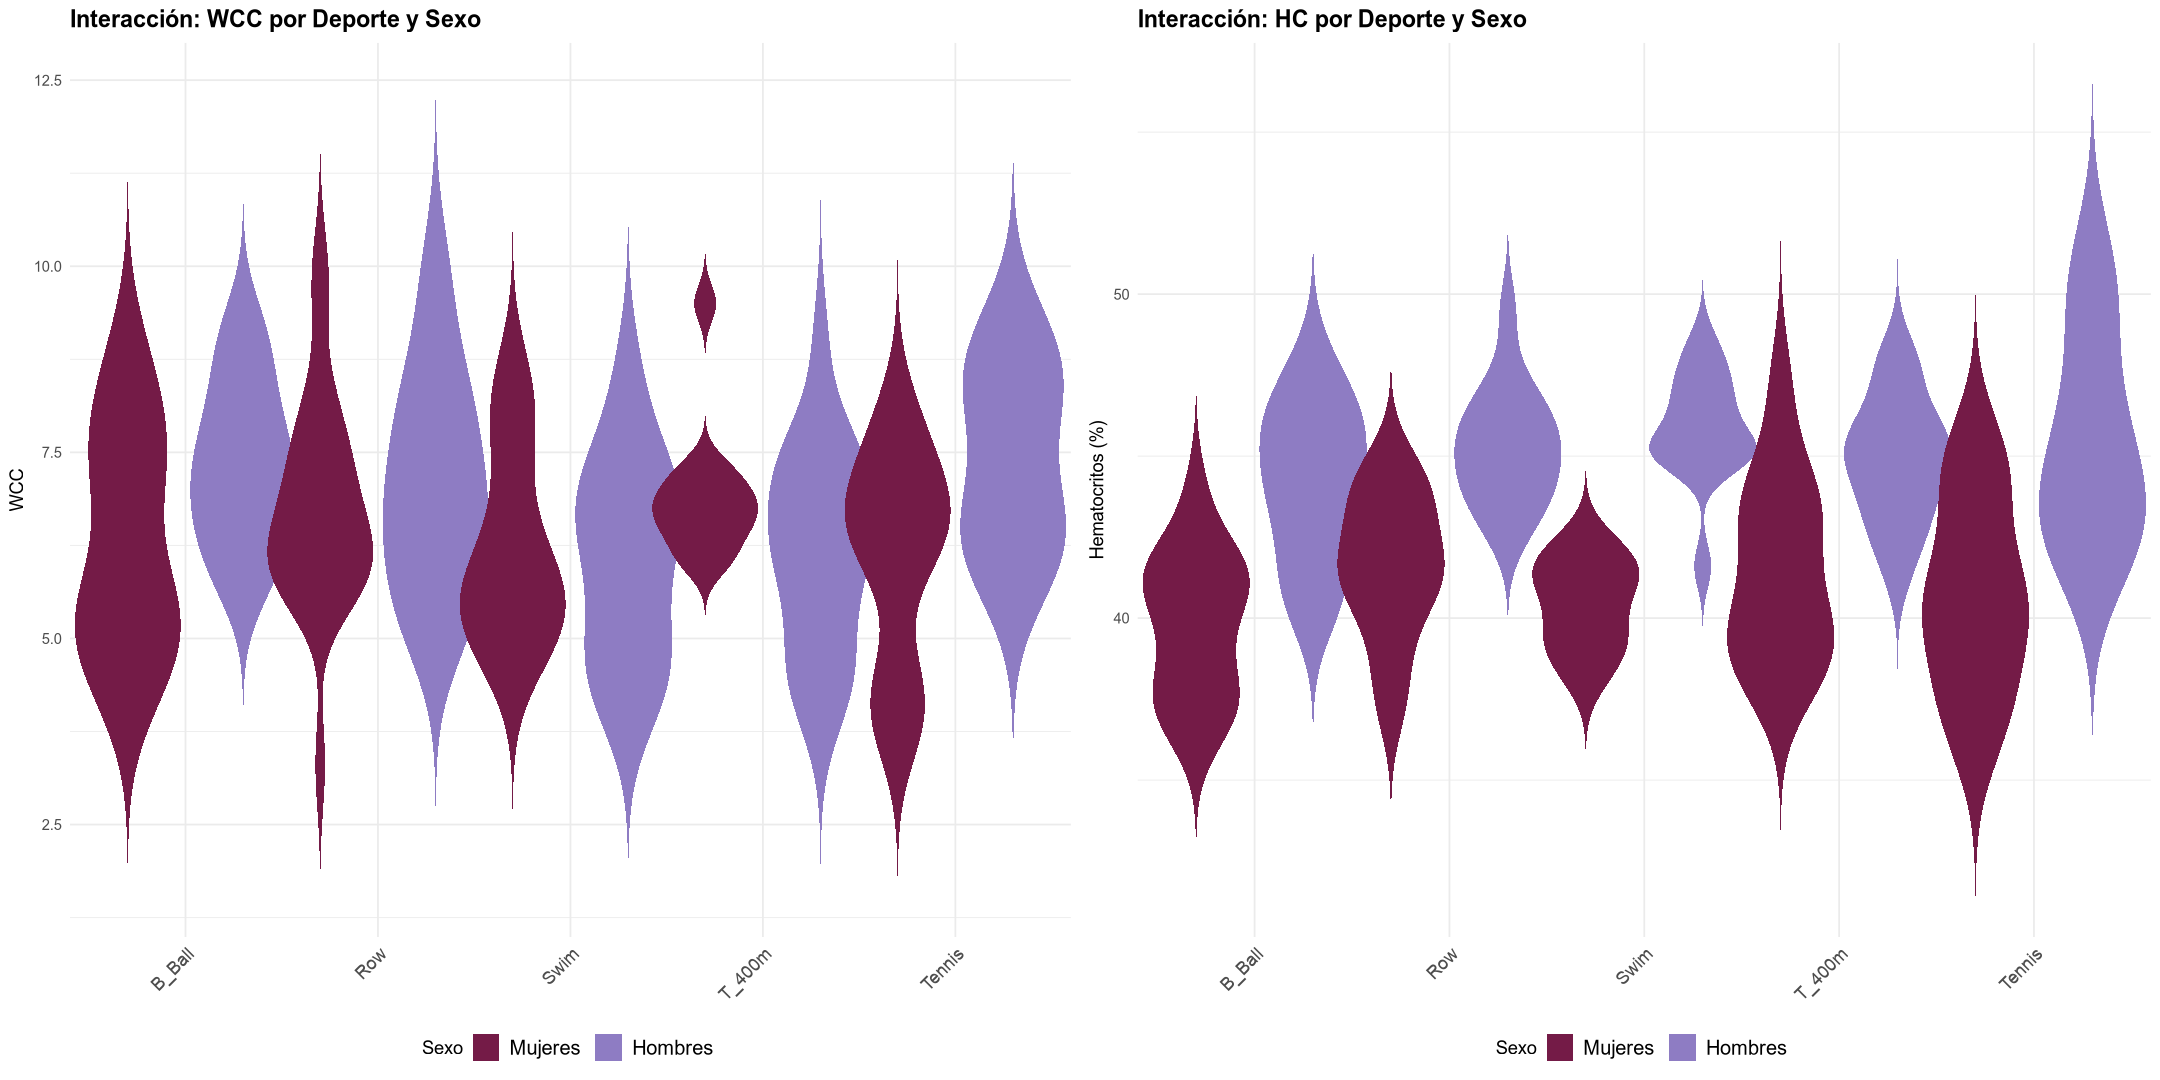

In [20]:
options(
  repr.plot.width = 18,
  repr.plot.height = 9
)

p_wcc <- ggplot(data_ais, aes(x = sport, y = wcc, fill = sex)) +
  geom_violin(
    color = NA,
    trim = FALSE,
    scale = "width",
    width = 1.1,
    position = position_dodge(width = 1.2)
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 11),
    plot.title = element_text(face = "bold", size = 14)
  ) +
  scale_fill_manual(
    values = c("f" = "#741b47", "m" = "#8e7cc3"),
    labels = c("Mujeres", "Hombres")
  ) +
  labs(
    title = "Interacción: WCC por Deporte y Sexo",
    fill = "Sexo", x = NULL, y = "WCC"
  )

p_hc <- ggplot(data_ais, aes(x = sport, y = hc, fill = sex)) +
  geom_violin(
    color = NA,
    trim = FALSE,
    scale = "width",
    width = 1.1,
    position = position_dodge(width = 1.2)
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 11),
    plot.title = element_text(face = "bold", size = 14)
  ) +
  scale_fill_manual(
    values = c("f" = "#741b47", "m" = "#8e7cc3"),
    labels = c("Mujeres", "Hombres")
  ) +
  labs(
    title = "Interacción: HC por Deporte y Sexo",
    fill = "Sexo", x = NULL, y = "Hematocritos (%)"
  )

grid.arrange(p_wcc, p_hc, ncol = 2)

#### 1. WCC:
El gráfico de la izquierda es muy revelador sobre el papel del deporte frente al sexo.
* En la mayoría de los deportes (B_Ball, Netball, Swim), los violines morado oscuro (mujeres) y morado claro (hombres) están a la misma altura. Esto sugiere que, en general, no hay una diferencia de base por ser hombre o mujer.
* Fíjandonos en Row. No solo ambos sexos tienen valores más altos que la media, sino que la dispersión (la altura del violín) es enorme. Además, en algunos deportes parece haber más diferencia entre sexos que en otros, aunque sutil.
* Es probable que el factor Deporte (`sport`) salga significativo (hay deportes con más glóbulos blancos), pero el factor `sex` no. La interacción (`sex:sport`) probablemente no sea significativa, ya que las tendencias son similares: si el deporte sube los niveles, los sube para ambos.

#### 2. HC:
El gráfico de la derecha muestra un comportamiento completamente diferente y muy ordenado.
* En todos los deportes, sin excepción, el violín claro (hombres) flota claramente por encima del oscuro (mujeres). Es como si hubiera un "escalón" biológico que no desaparece.
* La distancia vertical entre los violines de hombres y mujeres parece bastante constante en casi todas las disciplinas (quizás un poco más junta en *Swim* o *T_Sprnt* y más separada en *Tennis* o *Row*).
* Hipótesis para el Test:
    * `sex`: Saldrá extremadamente significativo (`p < 0.001`). Es el motor principal.
    * `sport`: Probablemente significativo, ya que algunos deportes de resistencia tienen medias generales más altas.
    * `sex:sport`: Aquí está la duda interesante. Si la distancia entre violines varía mucho (las líneas no serían paralelas), habrá interacción. Visualmente parece que la brecha se mantiene, lo que sugeriría no interacción (el dimorfismo es universal).


> *"En resumen la visualización de la interacción mediante diagramas de violín agrupados por deporte revela dos dinámicas fisiológicas distintas:*
>
> * Leucocitos (WCC): *Se observa una notable homogeneidad entre sexos dentro de cada disciplina (solapamiento de violines), sugiriendo que el género no es un factor determinante. Sin embargo, existen diferencias evidentes entre deportes, con disciplinas como el Remo (Row) mostrando valores basales y dispersiones superiores al resto, apuntando a un efecto principal del deporte vinculado a la exigencia física.*
>
> * Hematocritos (HC): *El patrón dominante es un dimorfismo sexual estricto y consistente. En todas las disciplinas, la distribución masculina se sitúa sistemáticamente por encima de la femenina, manteniendo una "brecha" visualmente constante. Esto sugiere que, aunque el tipo de deporte pueda modular ligeramente los niveles generales (efecto deporte), no altera la diferencia biológica estructural entre hombres y mujeres (posible ausencia de interacción fuerte)."*

Una vez verificados los supuestos de independencia y homocedasticidad (donde el Test de Bartlett confirmó varianzas iguales para wcc y hc con $p > 0.05$), y tras la inspección visual que sugiere patrones distintos de interacción, procedemos a realizar el ANOVA de Dos Vías. Este modelo estadístico nos permitirá descomponer la variabilidad total para determinar no solo los efectos principales del Sexo y el Deporte por separado, sino fundamentalmente su Interacción ($Sexo \times Deporte$), revelando si la fisiología masculina y femenina responde de manera diferenciada a las exigencias de cada disciplina.

### <font color='#3d59c6'> Test ANOVA Two-Way </font>

In [21]:
cat("Resultados ANOVA Two-Way (Interacción Sexo * Deporte)\n")
cat("Hipótesis a contrastar:\n")
cat("1. Efecto Sexo: ¿Difieren las medias entre hombres y mujeres?\n")
cat("2. Efecto Deporte: ¿Difieren las medias según la disciplina?\n")
cat("3. Interacción (sex:sport): ¿El efecto del sexo depende del deporte?\n")

modelo_wcc <- aov(wcc ~ sex * sport, data = data_ais)

cat("Variable Dependiente: WCC (Leucocitos)\n")
print(summary(modelo_wcc))

p_val_interaccion_wcc <- summary(modelo_wcc)[[1]][["Pr(>F)"]][3]
cat(
  "\n[Interpretación WCC]: La interacción ",
  ifelse(p_val_interaccion_wcc < 0.05, "ES significativa.",
    "NO es significativa."
  ), "\n\n"
)


modelo_hc <- aov(hc ~ sex * sport, data = data_ais)

cat("Variable Dependiente: HC (Hematocritos)\n")
print(summary(modelo_hc))

p_val_interaccion_hc <- summary(modelo_hc)[[1]][["Pr(>F)"]][3]
cat(
  "\n[Interpretación HC]: La interacción ",
  ifelse(p_val_interaccion_hc < 0.05, "ES significativa.",
    "NO es significativa."
  ), "\n"
)

Resultados ANOVA Two-Way (Interacción Sexo * Deporte)
Hipótesis a contrastar:
1. Efecto Sexo: ¿Difieren las medias entre hombres y mujeres?
2. Efecto Deporte: ¿Difieren las medias según la disciplina?
3. Interacción (sex:sport): ¿El efecto del sexo depende del deporte?
Variable Dependiente: WCC (Leucocitos)
             Df Sum Sq Mean Sq F value Pr(>F)
sex           1   0.65   0.653   0.353  0.553
sport         4  10.44   2.611   1.412  0.234
sex:sport     4  14.34   3.584   1.939  0.109
Residuals   114 210.75   1.849               

[Interpretación WCC]: La interacción  NO es significativa. 

Variable Dependiente: HC (Hematocritos)
             Df Sum Sq Mean Sq F value Pr(>F)    
sex           1  533.9   533.9 107.238 <2e-16 ***
sport         4   36.9     9.2   1.855  0.123    
sex:sport     4   15.2     3.8   0.765  0.550    
Residuals   114  567.6     5.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[Interpretación HC]: La interacción  NO e

#### Interpretación de Resultados: ANOVA Two-Way

El análisis de varianza de dos factores arroja resultados contrastados que definen claramente la naturaleza biológica de las variables estudiadas.

1. Glóbulos Blancos (`wcc`): 
Contrario a lo que podría sugerir la inspección visual de los *outliers* en Remo, el test estadístico es contundente:
* Ni el Sexo ($p=0.55$) ni el Deporte ($p=0.23$) muestran diferencias estadísticamente significativas.
    * La variabilidad interna dentro de cada grupo (la dispersión de los datos) es tan grande que "oculta" las diferencias entre las medias de los deportes. Aunque visualmente Remo parecía más alto, la varianza era tan alta (violines muy largos) que el modelo no puede asegurar que sea una diferencia real y no azarosa.
* Sin Interacción: ($p=0.109$). El comportamiento de la variable es independiente de la combinación de factores.
* Los niveles de leucocitos en esta muestra parecen depender de factores individuales o fisiológicos no recogidos por las categorías de "Género" o "Disciplina Deportiva".

2. Hematocritos (`hc`): 
* Con un $p\text{-value} < 2 \times 10^{-16}$ y un valor $F=107$, el sexo es el predictor absoluto. La diferencia biológica es masiva.
* Efecto Deporte: ($p=0.12$). Esto es un hallazgo importante. Una vez que descontamos el efecto de ser hombre o mujer, el deporte que practicas no altera significativamente tu nivel de hematocritos. Un tenista y un remero tienen, estadísticamente, el mismo volumen celular base si son del mismo sexo.
* Interacción Nula: ($p=0.55$). Confirmamos la hipótesis visual de las "líneas paralelas". La brecha entre hombres y mujeres es constante; ningún deporte "cierra" o "amplía" esta diferencia fisiológica.

---

> Resumen Final:
> El modelo Two-Way confirma que para variables hematológicas estructurales (`hc`), la biología (sexo) prevalece sobre la actividad (deporte), sin que exista interacción entre ambas. Por otro lado, para variables de respuesta inmunológica (`wcc`), ninguno de los factores categóricos estudiados posee poder explicativo suficiente, sugiriendo que la variabilidad responde a causas idiosincrásicas del atleta (estrés agudo, salud individual) más que a su categoría competitiva.

## <font color='#3d59c6'>  3. Conclusiones </font>

El análisis exhaustivo del conjunto de datos `data_ais`, abarcando desde la exploración visual hasta el modelado inferencial (ANOVA de una y dos vías), nos permite extraer cuatro conclusiones fundamentales sobre el perfil fisiológico de los atletas:

#### 1. La Biología prevalece sobre el Entrenamiento (Perfil Hematológico)
Los resultados confirman de manera contundente un dimorfismo sexual estricto en las variables de transporte de oxígeno (`hg`, `hc`, `rcc`).
* El ANOVA Two-Way para hematocritos (`hc`) arrojó una diferencia extremadamente significativa por sexo ($p < 2e^{-16}$), mientras que el factor deporte y la interacción no resultaron significativos.
* La capacidad hematológica es una característica estructural ligada al género biológico. El tipo de disciplina deportiva no altera esta brecha; los hombres presentan valores basales superiores a las mujeres independientemente de si practican deportes de resistencia o técnicos.

#### 2. El Deporte moldea la Morfología (BMI)
A diferencia de la sangre, la composición corporal (`bmi`) muestra una interacción más compleja entre biología y actividad.
* Aunque el ANOVA One-Way mostró diferencias significativas por sexo, el análisis descriptivo y los gráficos de violín revelaron un solapamiento considerable entre grupos y una fuerte dependencia del tipo de deporte (ej. *Row* vs *T_400m*).
* La morfología responde a una adaptación funcional. Las exigencias físicas de la disciplina (potencia en remo vs. ligereza en velocidad) son predictores tan o más relevantes que el género para determinar la masa corporal del atleta.

#### 3. El Sistema Inmune es Idiosincrásico (WCC)
El análisis de los glóbulos blancos (`wcc`) rompe con los patrones anteriores, comportándose como una variable independiente.
* El ANOVA Two-Way no encontró significancia estadística ni para el sexo ni para el deporte. Sin embargo, el análisis de *outliers* identificó valores extremos exclusivamente en la disciplina de Remo.
* Los niveles de leucocitos no dependen de categorías estructurales (hombre/mujer o tenista/nadador), sino probablemente de estados transitorios de estrés fisiológico. Los picos observados en remeros sugieren una respuesta de leucocitosis aguda ante el esfuerzo extremo, más que una característica basal del grupo.

#### 4. Multicolinealidad
Desde el punto de vista metodológico, la matriz de correlaciones reveló una asociación casi lineal ($r > 0.9$) entre Hemoglobina, Hematocritos y Glóbulos Rojos.
* Estas tres variables aportan información redundante. Para futuros modelos predictivos, se recomienda seleccionar únicamente una de ellas para garantizar estabilidad del modelo.

* Resumen Final
> *En conclusión, el perfil del atleta en este dataset se define por una fisiología sanguínea determinada por el sexo, una morfología adaptada a la disciplina deportiva y una respuesta inmunológica variable vinculada probablemente al estrés individual del entrenamiento, sin que se observen interacciones complejas (efectos multiplicativos) entre el género y el deporte en las variables analizadas.*